In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline  

from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
from IPython.display import display

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
df1 =pd.read_csv('Sparkling.csv')

In [3]:
df1.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
df1.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [5]:
df1.shape

(187, 2)

In [6]:
df1.duplicated().sum()

0

In [7]:
df1.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [8]:
df1.isna().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [9]:
df1.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [10]:
df1['Date']=pd.date_range(start='1980-01',end='1995-08',freq='M')

In [11]:
df1.head()

YearMonth  Sparkling       Date
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [12]:
df1.drop(['YearMonth'],axis=1,inplace=True)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Sparkling  187 non-null    int64         
 1   Date       187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [14]:
df1.set_index('Date',inplace=True)

In [15]:
df1.head()

Sparkling
Date                 
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

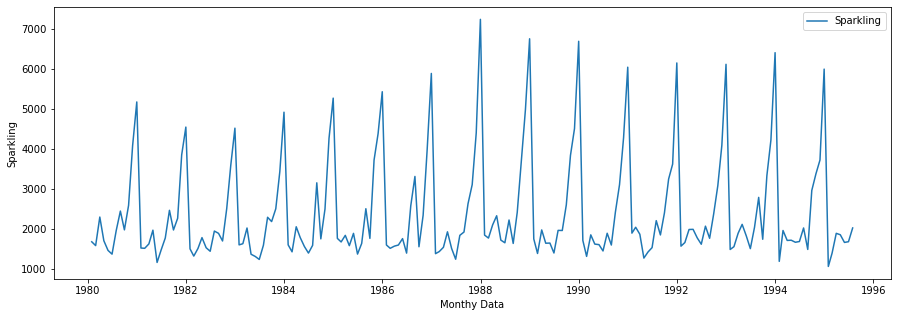

In [17]:
plt.figure(figsize=(15,5))
plt.plot(df1)
plt.xlabel('Monthy Data')
plt.ylabel('Sparkling',)
plt.legend(['Sparkling'])

#Data looks to have a constant seasonality and uniform trend.

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

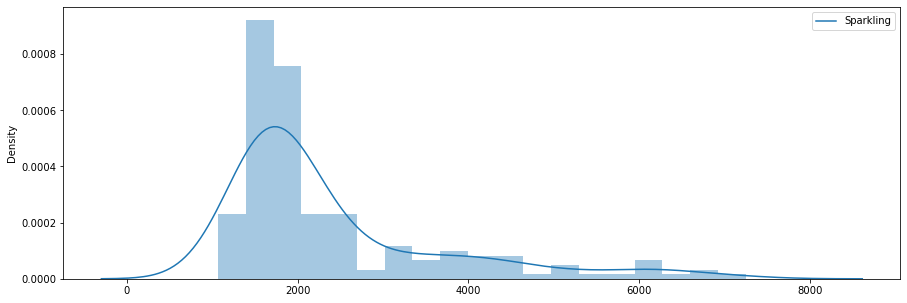

In [18]:
plt.figure(figsize=(15,5))
sns.distplot(df1)
plt.legend(['Sparkling'])
#Data is skewed

Text(0.5, 0, 'Year')

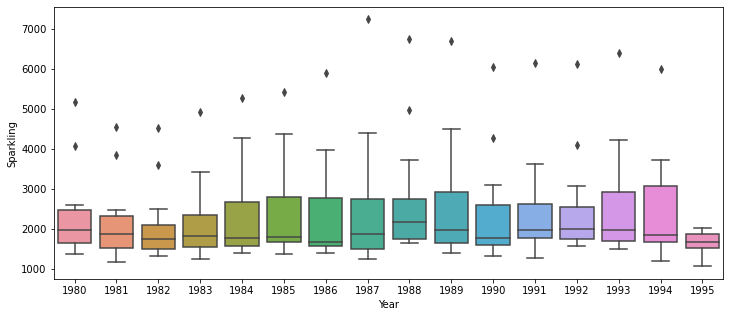

In [19]:
#Outliers are present when looking at corresponding year wise data
plt.figure(figsize=(12,5))
sns.boxplot(df1.index.year,df1['Sparkling'])
plt.xlabel('Year')

Text(0.5, 0, 'Year')

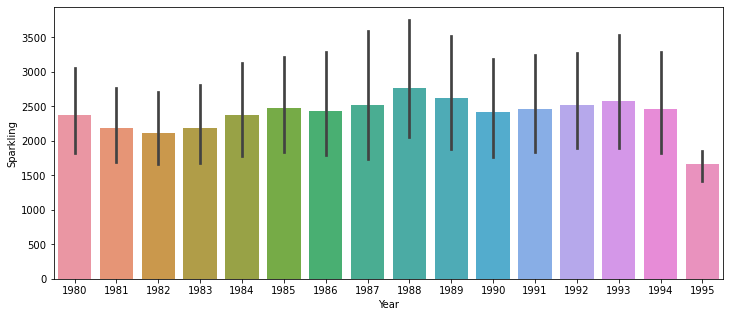

In [20]:
#Data seems to have more or less same sales across the year. 1988 has recorded maximum sales.
plt.figure(figsize=(12,5))
sns.barplot(df1.index.year,df1['Sparkling'])
plt.xlabel('Year')

Text(0.5, 0, 'Months')

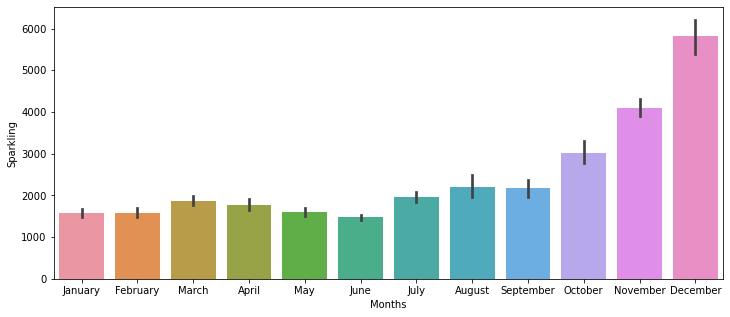

In [21]:
#December have greatest amount of sales across all the months followed be November and Oct. 
# Greater in sales may be due to the celebration in year end
plt.figure(figsize=(12,5))
sns.barplot(df1.index.month_name(),df1['Sparkling'])
plt.xlabel('Months')

Text(0.5, 0, 'Months')

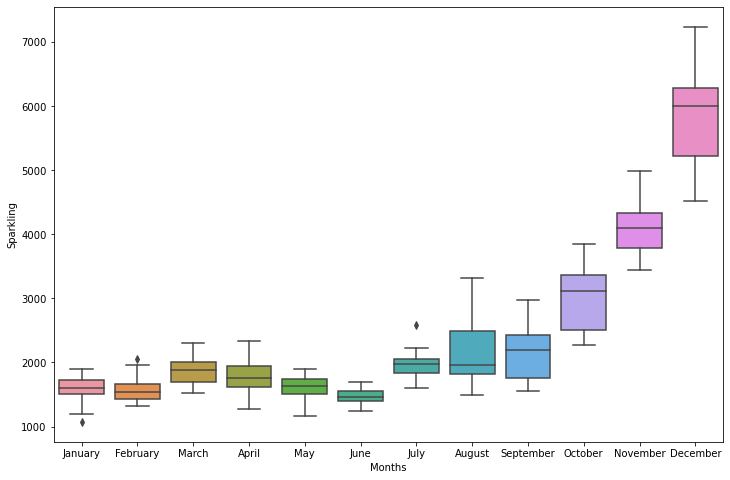

In [22]:
#Box plot is also showing us that December has recorded most number of sales
plt.figure(figsize=(12,8))
sns.boxplot(df1.index.month_name(),df1['Sparkling'])
plt.xlabel('Months')

<AxesSubplot:xlabel='Date', ylabel='Sparkling'>

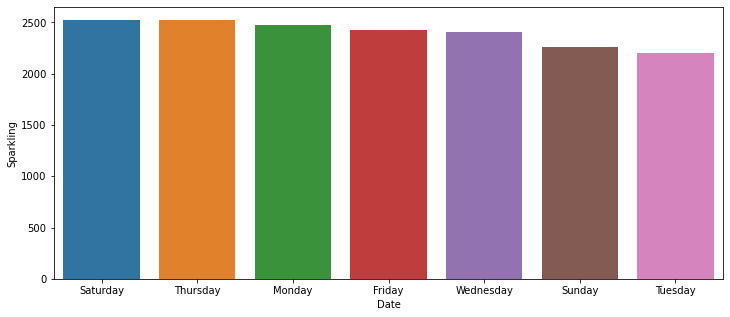

In [23]:
#Saturday registers highest average sales of beer throughout the whole week.
Tot_mean=df1.groupby(df1.index.day_name()).mean().reset_index()
Tot_mean=Tot_mean.sort_values(by='Sparkling',ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(Tot_mean['Date'],Tot_mean['Sparkling'])

<AxesSubplot:xlabel='Date', ylabel='Sparkling'>

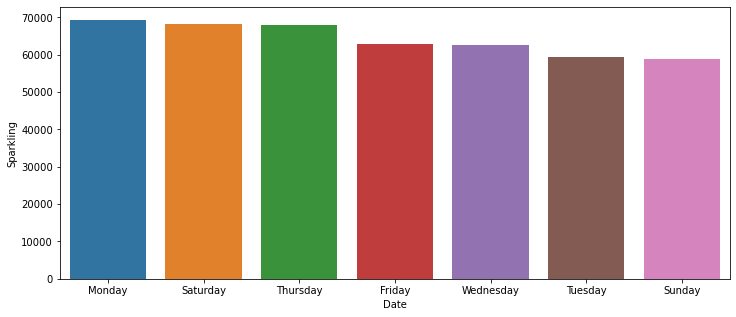

In [24]:
#Monday has the highest sales overall
Tot_sum=df1.groupby(df1.index.day_name()).sum().reset_index()
Tot_sum=Tot_sum.sort_values(by='Sparkling',ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(Tot_sum['Date'],Tot_sum['Sparkling'])

## Time series monthplot to understand the spread of Sparkling Sales across different years and within different months across years.

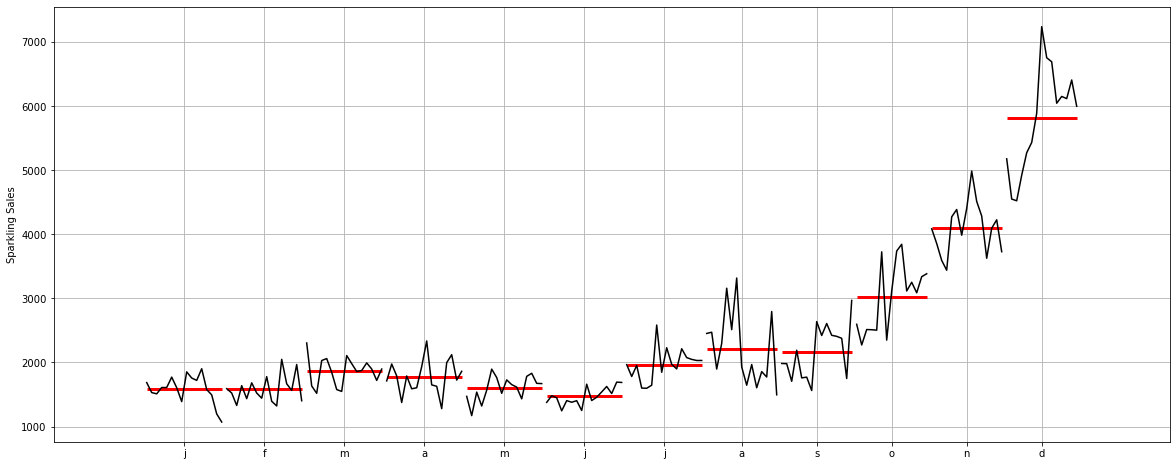

In [25]:
from statsmodels.graphics.tsaplots import month_plot

rcParams['figure.figsize'] = 20,8
month_plot(df1['Sparkling'],ylabel='Sparkling Sales')
plt.grid();

## graph of monthly Sparkling's Sales across years

In [26]:
#Creating PIVOT table.
monthly_sales_across_years = pd.pivot_table(df1, values = 'Sparkling', columns = df1.index.month_name(), index = df1.index.year)
monthly_sales_across_years

Date   April  August  December  February  January    July    June   March  \
Date                                                                        
1980  1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0  2304.0   
1981  1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0  1633.0   
1982  1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0  1518.0   
1983  1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0  2030.0   
1984  1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0  2061.0   
1985  1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0  1846.0   
1986  1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0  1577.0   
1987  1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0  1548.0   
1988  2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0  2108.0   
1989  1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0  1982.0   
1990  1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0  1859.0   
1991  1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0  1874.0   
1992  1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0  1993.0   
1993  2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0  1898.0   
1994  1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0  1720.0   
1995  1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0  1897.0   

Date     May  November  October  September  
Date                                        
1980  1471.0    4087.0   2596.0     1984.0  
1981  1170.0    3857.0   2273.0     1981.0  
1982  1537.0    3593.0   2514.0     1706.0  
1983  1320.0    3440.0   2511.0     2191.0  
1984  1567.0    4273.0   2504.0     1759.0  
1985  1896.0    4388.0   3727.0     1771.0  
1986  1765.0    3987.0   2349.0     1562.0  
1987  1518.0    4405.0   3114.0     2638.0  
1988  1728.0    4988.0   3740.0     2421.0  
1989  1654.0    4514.0   3845.0     2608.0  
1990  1615.0    4286.0   3116.0     2424.0  
1991  1432.0    3627.0   3252.0     2408.0  
1992  1783.0    4096.0   3088.0     2377.0  
1993  1831.0    4227.0   3339.0     1749.0  
1994  1674.0    3729.0   3385.0     2968.0  
1995  1670.0       NaN      NaN        NaN

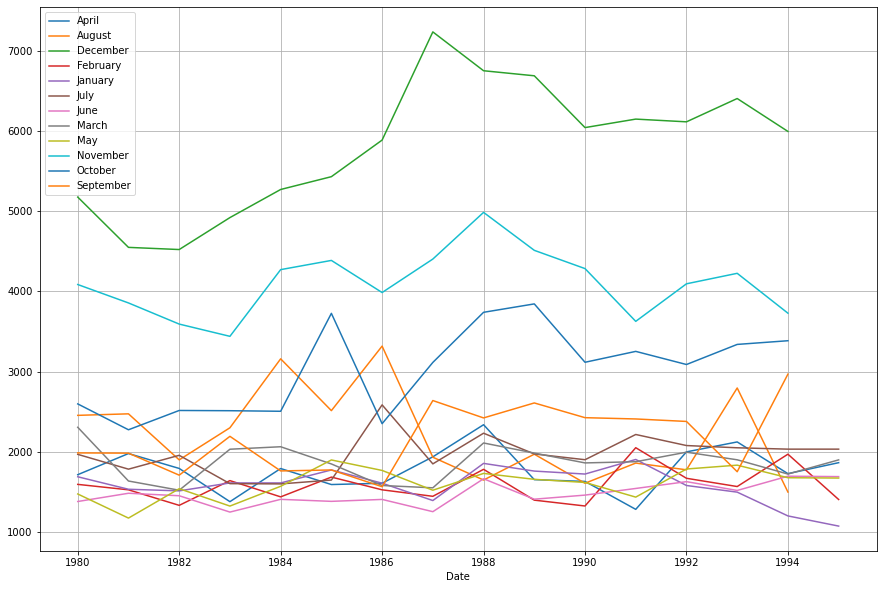

In [27]:
#Dec registers the highest amount of sales
monthly_sales_across_years.plot(figsize=(15,10))
plt.grid()
plt.legend(loc='best');

## Empirical Cumulative Distribution

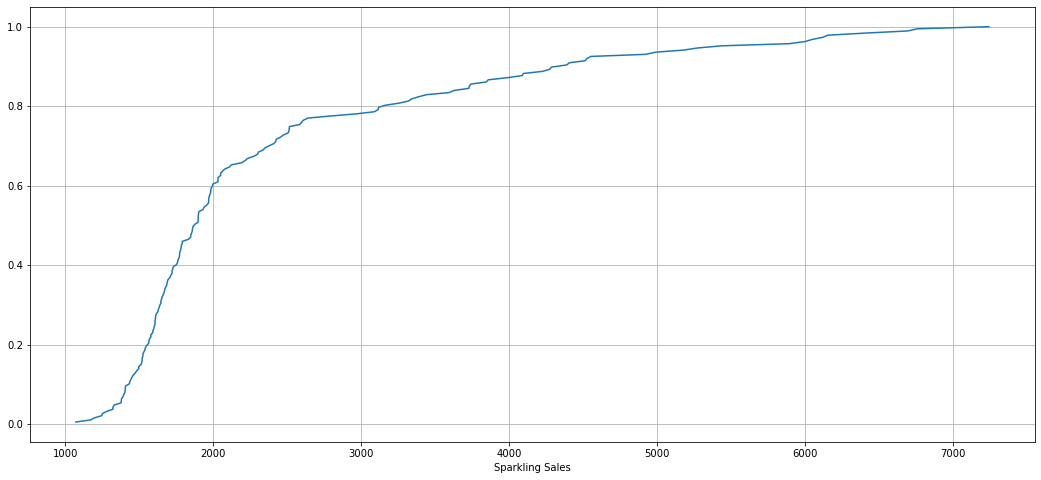

In [28]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df1['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling Sales');

## Average Sparkling Sales per month and the month on month percentage change of Sparkling Sales.

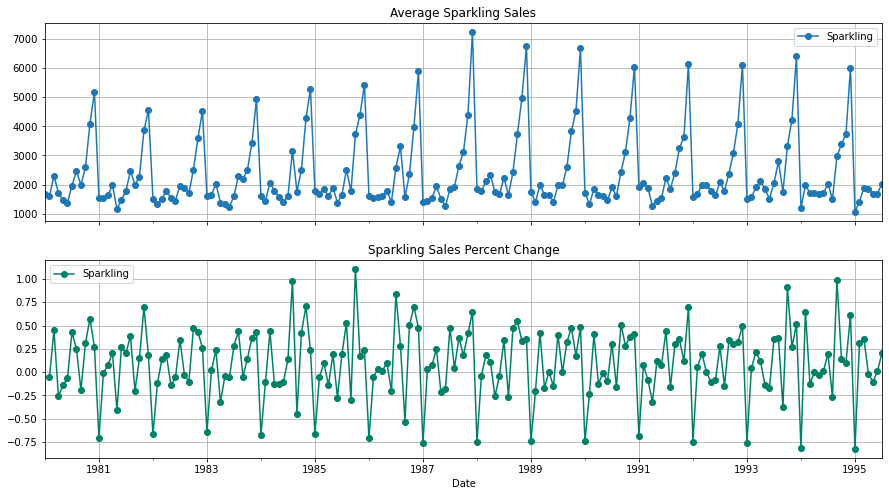

In [29]:
# group by date and get average Sparkling Sales, and precent change
average    = df1.groupby(df1.index)["Sparkling"].mean()
pct_change = df1.groupby(df1.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sparkling Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sparkling Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Sales Percent Change",grid=True)

## Decomposition of dataset

In [30]:
#As the seasonal variation is more or less constant hence we will going to choose additive model.
decompose_addition=seasonal_decompose(df1,model='additive',extrapolate_trend='freq')

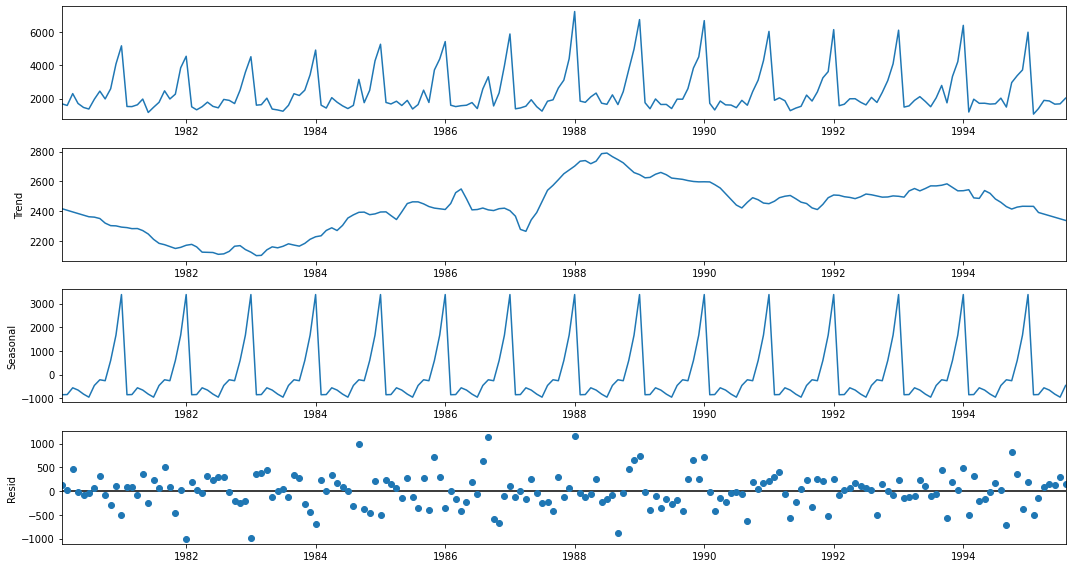

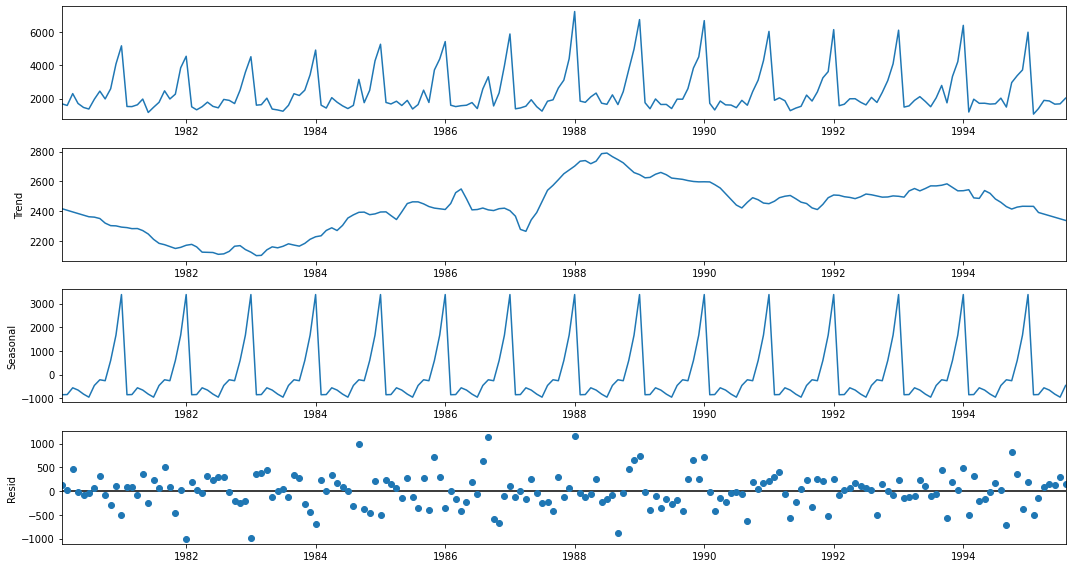

In [31]:
rcParams['figure.figsize'] = 15,8
decompose_addition.plot()

In [32]:
trend_add = decompose_addition.trend
seasonality_add = decompose_addition.seasonal
residual_add = decompose_addition.resid

print('Trend','\n',trend_add.head(),'\n')
print('Seasonality','\n',seasonality_add.head(),'\n')
print('Residual','\n',residual_add.head(),'\n')

Trend 
 Date
1980-01-31    2417.116647
1980-02-29    2406.350767
1980-03-31    2395.584887
1980-04-30    2384.819007
1980-05-31    2374.053127
Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31   -852.939513
1980-02-29   -845.687698
1980-03-31   -560.602944
1980-04-30   -656.317669
1980-05-31   -827.225103
Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31    121.822865
1980-02-29     30.336930
1980-03-31    469.018056
1980-04-30    -16.501338
1980-05-31    -75.828025
Name: resid, dtype: float64 



In [33]:
#Creating decomposition using multiplicative model
decompose_multi=seasonal_decompose(df1,model='multiplicative',extrapolate_trend='freq')

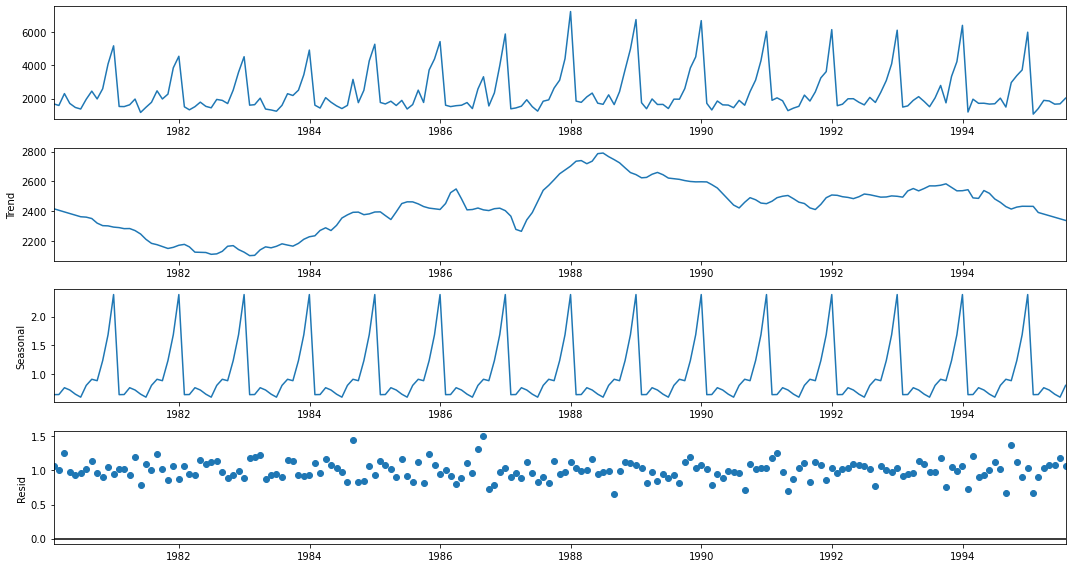

<Figure size 1080x360 with 0 Axes>

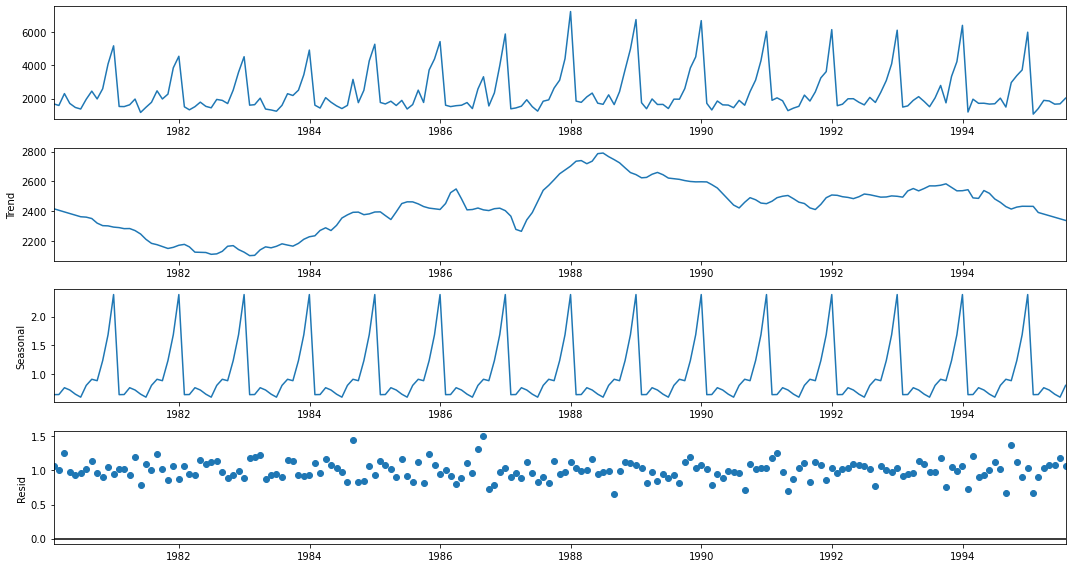

In [34]:
plt.figure(figsize=(15,5))
decompose_multi.plot()

In [35]:
trend_mul = decompose_multi.trend
seasonality_mul = decompose_multi.seasonal
residual_mul = decompose_multi.resid

print('Trend','\n',trend_mul.head(),'\n')
print('Seasonality','\n',seasonality_mul.head(),'\n')
print('Residual','\n',residual_mul.head(),'\n')

Trend 
 Date
1980-01-31    2417.116647
1980-02-29    2406.350767
1980-03-31    2395.584887
1980-04-30    2384.819007
1980-05-31    2374.053127
Name: trend, dtype: float64 

Seasonality 
 Date
1980-01-31    0.651394
1980-02-29    0.653344
1980-03-31    0.770983
1980-04-30    0.731422
1980-05-31    0.659550
Name: seasonal, dtype: float64 

Residual 
 Date
1980-01-31    1.070819
1980-02-29    1.011975
1980-03-31    1.247458
1980-04-30    0.981478
1980-05-31    0.939452
Name: resid, dtype: float64 



# 3. Split the data into training and test. The test data should start in 1991.

In [36]:
train=df1.loc['1980-01-31':'1990-12-31']
test=df1.loc['1991-01-31':]

In [37]:
train.tail()

Sparkling
Date                 
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [38]:
test.head()

Sparkling
Date                 
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

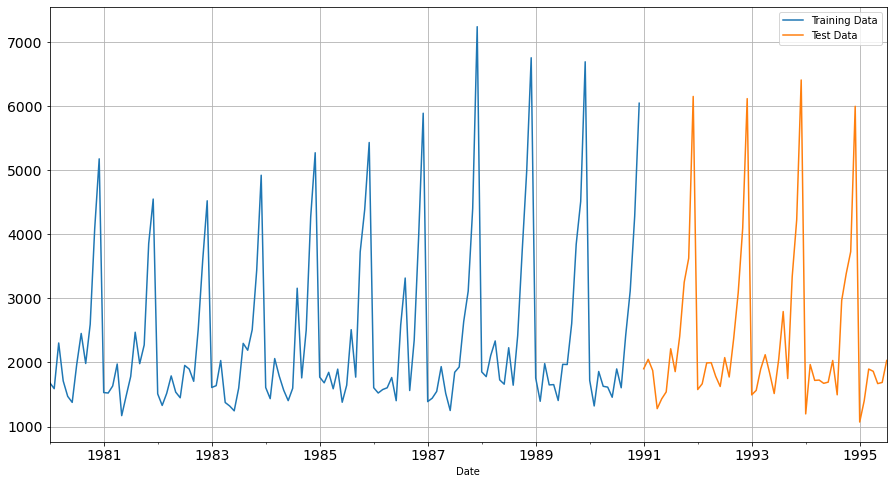

In [39]:
#Plotting Training - Testing Data
train['Sparkling'].plot(figsize=(15,8), fontsize=14)
test['Sparkling'].plot(figsize=(15,8), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

## Model 1: Linear Regression

In [40]:
train_time= [ i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]

In [41]:
print("The train time are ",train_time,'\n')
print("The test time are ",test_time)

The train time are  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 

The test time are  [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [42]:
train_reg=train.copy()
test_reg=test.copy()
train_reg['train_time']=train_time
test_reg['test_time']=test_time

In [43]:
print(train_reg.head())
print(test_reg.head())

            Sparkling  train_time
Date                             
1980-01-31       1686           1
1980-02-29       1591           2
1980-03-31       2304           3
1980-04-30       1712           4
1980-05-31       1471           5
            Sparkling  test_time
Date                            
1991-01-31       1902        133
1991-02-28       2049        134
1991-03-31       1874        135
1991-04-30       1279        136
1991-05-31       1432        137


In [44]:
lr=LinearRegression()

In [45]:
#Fitting Regression model on training dataset
lr=lr.fit(train_reg[['train_time']],train_reg['Sparkling'])

In [46]:
train_predictions_model1 = lr.predict(train_reg[['train_time']])
train_reg['RegOnTime'] = train_predictions_model1
train_reg.head()

Sparkling  train_time    RegOnTime
Date                                          
1980-01-31       1686           1  2021.741171
1980-02-29       1591           2  2027.573830
1980-03-31       2304           3  2033.406488
1980-04-30       1712           4  2039.239147
1980-05-31       1471           5  2045.071805

In [47]:
test_predictions_model1 = lr.predict(test_reg[['test_time']])
test_reg['RegOnTime'] = test_predictions_model1
test_reg.head()

Sparkling  test_time    RegOnTime
Date                                         
1991-01-31       1902        133  2791.652093
1991-02-28       2049        134  2797.484752
1991-03-31       1874        135  2803.317410
1991-04-30       1279        136  2809.150069
1991-05-31       1432        137  2814.982727

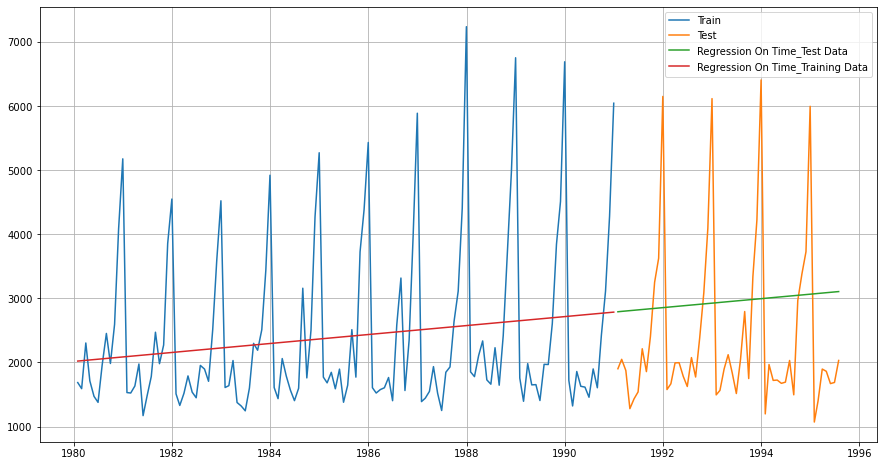

In [48]:
#Plotting Training,Testing and values obtained from regression model.
plt.figure(figsize=(15,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(test_reg['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(train_reg['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [49]:
# Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [50]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 1279.322 and MAPE is 40.05


In [51]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 and MAPE is 50.15


In [52]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [64]:
#In this model the last value of the training dataset is taken as the predicted values
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [65]:
## Let us get the last value (or the most recent value) of the training set.
NaiveModel_train['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_train['naive'].head()

Date
1980-01-31    6047
1980-02-29    6047
1980-03-31    6047
1980-04-30    6047
1980-05-31    6047
Name: naive, dtype: int64

In [66]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Date
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

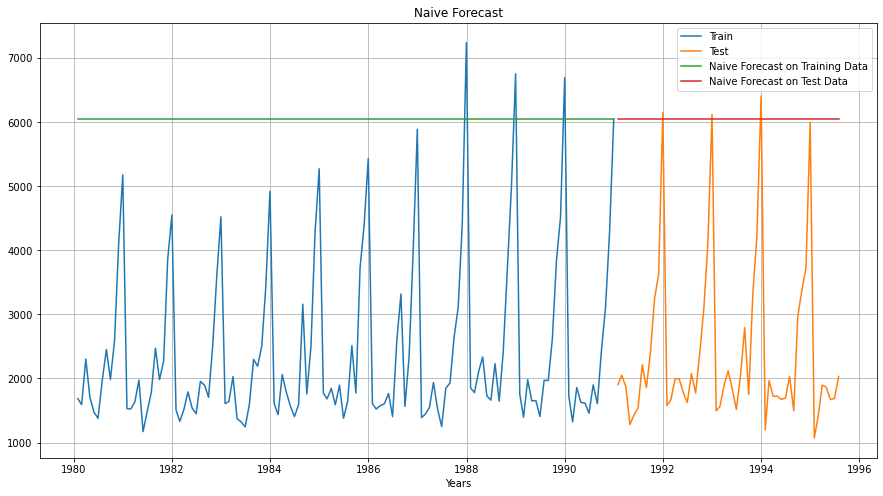

In [67]:
plt.figure(figsize=(15,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.xlabel("Years")
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation 

In [68]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sparkling'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 3867.701 and MAPE is 153.17


In [69]:
## Test Data - RMSE and MAPE
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sparkling'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279 and MAPE is 152.87


In [70]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87
NaiveModel        3864.279352     152.87

## Method 3: Simple Average

In [71]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [72]:
## Let us get the pedicted values as the mean values of the training set.
SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

Sparkling  mean_forecast
Date                                
1980-01-31       1686    2403.780303
1980-02-29       1591    2403.780303
1980-03-31       2304    2403.780303
1980-04-30       1712    2403.780303
1980-05-31       1471    2403.780303

In [73]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Date                                
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

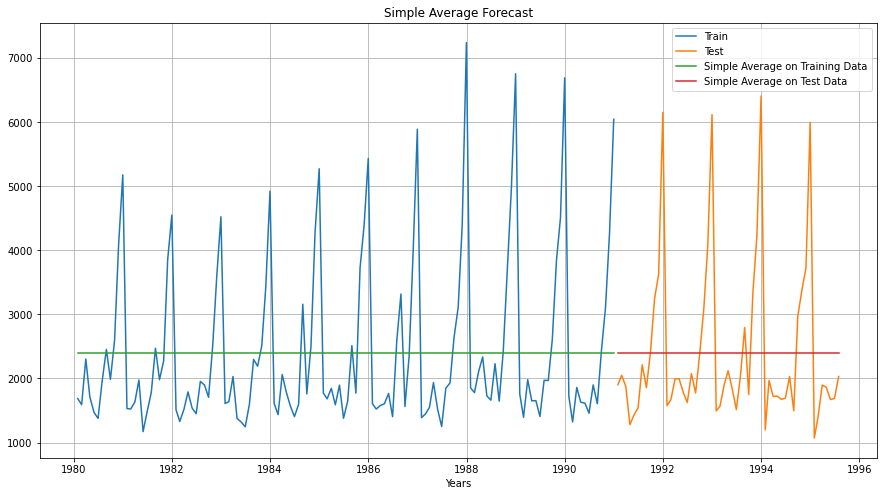

In [74]:
plt.figure(figsize=(15,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.xlabel("Years")
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation of Simple Average

In [75]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 1298.484 and MAPE is 40.36


In [76]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082 and MAPE is 38.90


In [77]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    1389.135175      50.15
NaiveModel          3864.279352     152.87
NaiveModel          3864.279352     152.87
SimpleAverageModel  1275.081804      38.90

## Method 4: Moving Average(MA)

In [78]:
MovingAverage = df1.copy()
MovingAverage.head()

Sparkling
Date                 
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [79]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Date                                                                 
1980-01-31       1686         NaN         NaN         NaN         NaN
1980-02-29       1591      1638.5         NaN         NaN         NaN
1980-03-31       2304      1947.5         NaN         NaN         NaN
1980-04-30       1712      2008.0     1823.25         NaN         NaN
1980-05-31       1471      1591.5     1769.50         NaN         NaN

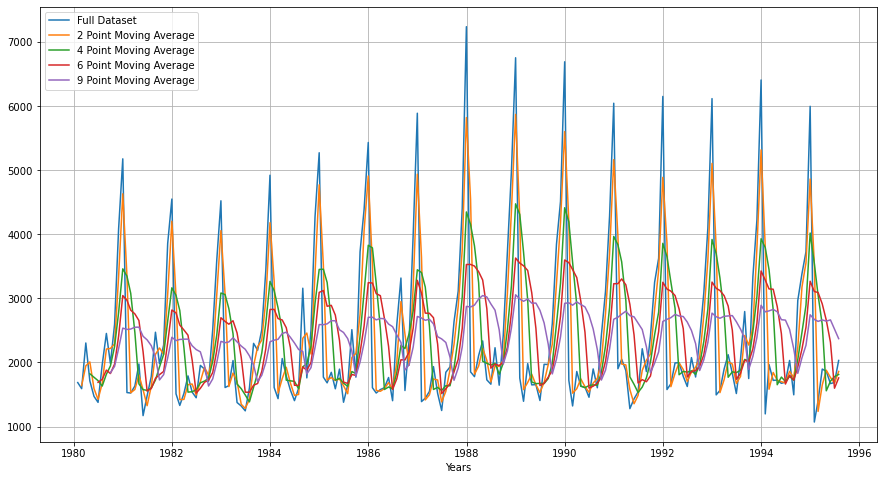

In [80]:
## Plotting on the whole data
plt.figure(figsize=(15,8))
plt.plot(MovingAverage['Sparkling'], label='Full Dataset')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.xlabel("Years")
plt.legend(loc = 'best')
plt.grid();

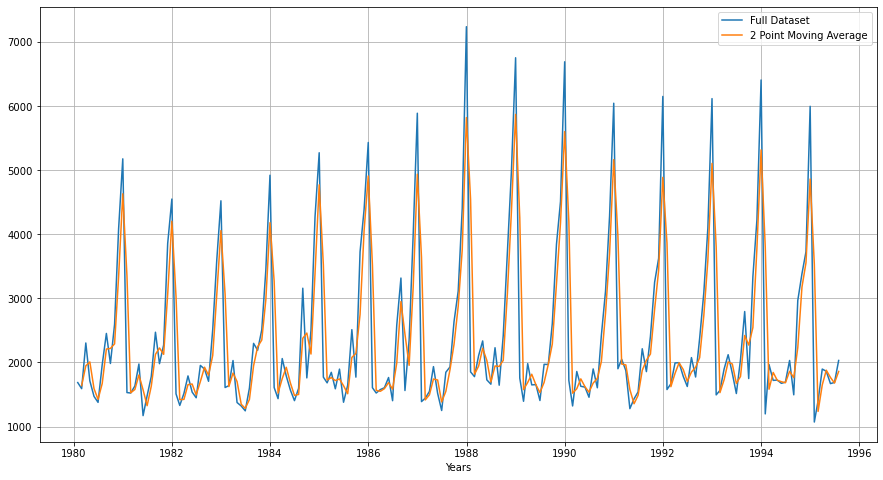

In [81]:
## Plotting on the whole data
plt.figure(figsize=(15,8))
plt.plot(MovingAverage['Sparkling'], label='Full Dataset')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.xlabel("Years")
plt.legend(loc = 'best')
plt.grid();

In [82]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

In [83]:
## Plotting on both the Training and Test data
plt.figure(figsize=(15,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')

plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.xlabel("Years")
plt.legend(loc='best')
plt.grid()

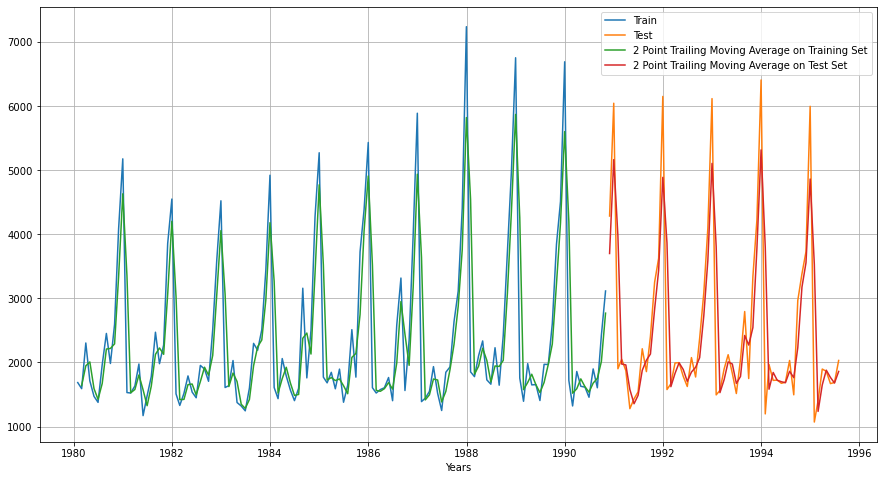

In [84]:
## Plotting on both the Training and Test data
plt.figure(figsize=(15,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.xlabel("Years")
plt.legend(loc='best')
plt.grid()

In [85]:
trailing_MovingAverage_test.head()

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
Date                                                                   
1990-11-30       4286      3701.0     2857.75  2464.500000  2209.888889
1990-12-31       6047      5166.5     3968.25  3229.500000  2675.222222
1991-01-31       1902      3974.5     3837.75  3230.000000  2705.666667
1991-02-28       2049      1975.5     3571.00  3304.000000  2753.888889
1991-03-31       1874      1961.5     2968.00  3212.333333  2800.222222

In [86]:
trailing_MovingAverage_test.shape

(57, 5)

In [87]:
test.head()

Sparkling
Date                 
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

In [88]:
test.shape

(55, 1)

### Model Evaluation on moving average

In [89]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'][2:],squared=False)
mape_model4_test_2 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'][2:])
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))## Test Data - RMSE and MAPE --> 4 point Trailing MA

## Test Data - RMSE and MAPE --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'][2:],squared=False)
mape_model4_test_4 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'][2:])
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'][2:],squared=False)
mape_model4_test_6 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'][2:])
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'][2:],squared=False)
mape_model4_test_9 = MAPE(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'][2:])
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 813.401 and MAPE is 19.70
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 1156.590 and MAPE is 35.96
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 1283.927 and MAPE is 43.86
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 1346.278 and MAPE is 46.86


In [90]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             1389.135175      50.15
NaiveModel                   3864.279352     152.87
NaiveModel                   3864.279352     152.87
SimpleAverageModel           1275.081804      38.90
2pointTrailingMovingAverage   813.400684      19.70
4pointTrailingMovingAverage  1156.589694      35.96
6pointTrailingMovingAverage  1283.927428      43.86
9pointTrailingMovingAverage  1346.278315      46.86

### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

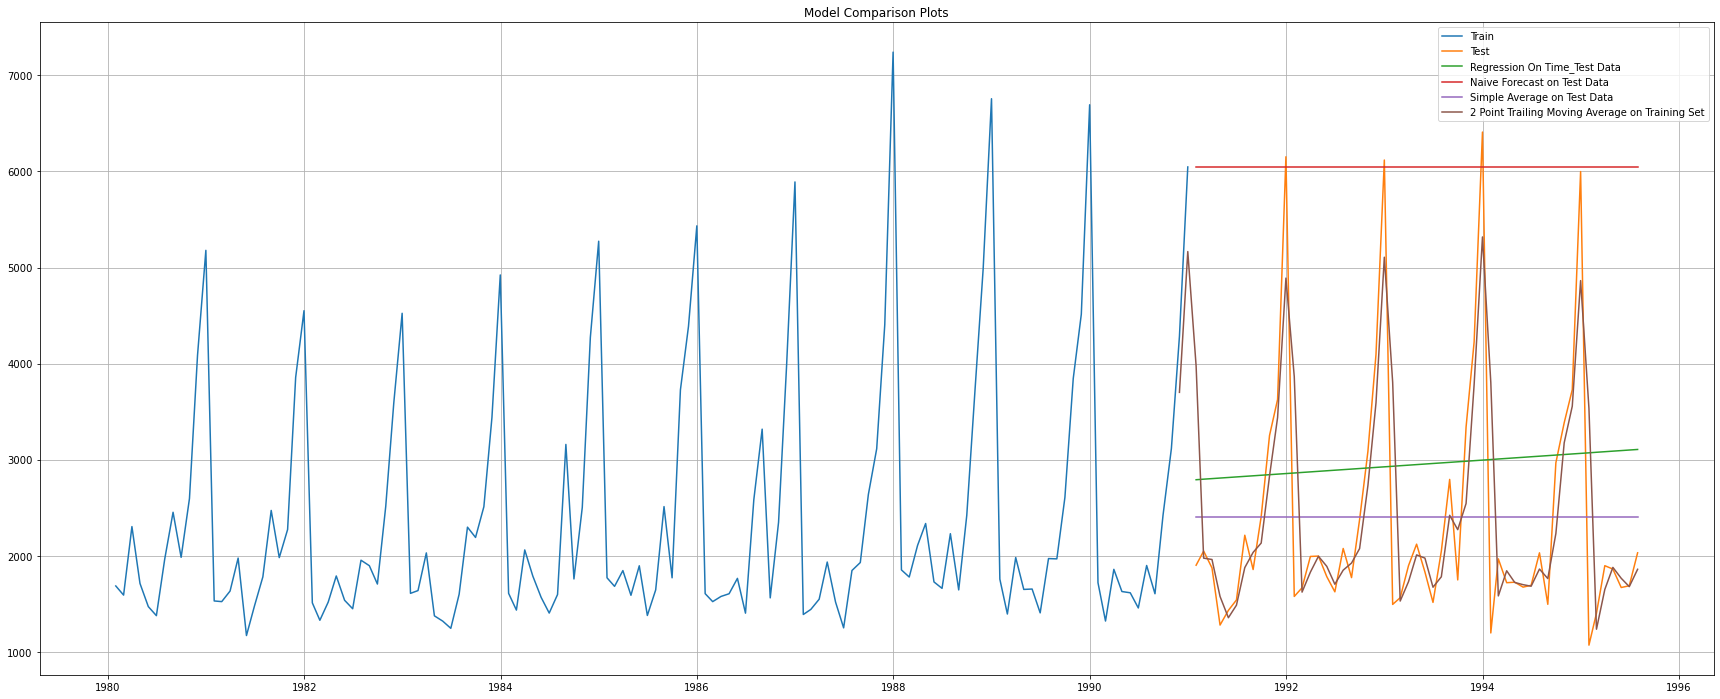

In [91]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(test_reg['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [92]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [93]:
SES_train = train.copy()
SES_test = test.copy()

In [94]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'].astype('double'))

In [95]:
model_SES_autofit = model_SES.fit(optimized=True)

In [96]:
model_SES.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [97]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling      predict
Date                              
1991-01-31       1902  2724.932624
1991-02-28       2049  2724.932624
1991-03-31       1874  2724.932624
1991-04-30       1279  2724.932624
1991-05-31       1432  2724.932624

In [98]:
print('Smoothing Level', np.round(model_SES.params['smoothing_level'], 4))
print('Initial Level', np.round(model_SES.params['initial_level'], 4))

Smoothing Level 0.0496
Initial Level 1818.5358


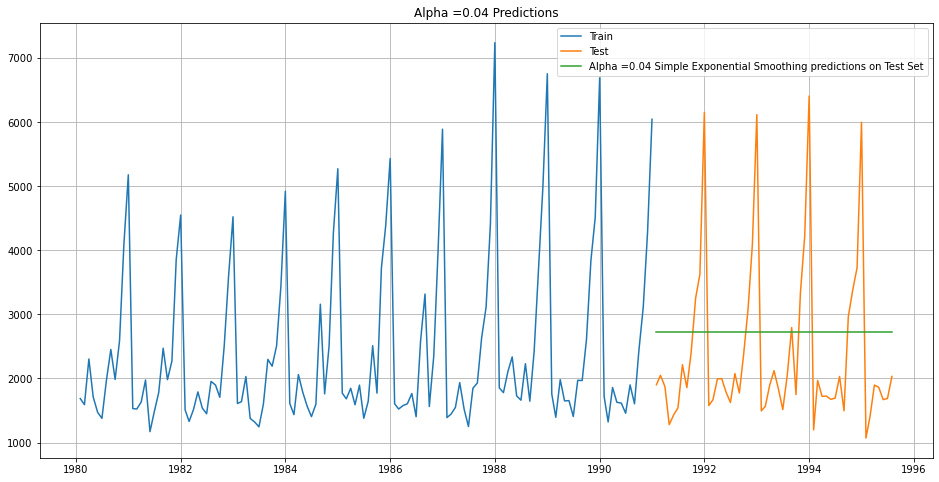

In [99]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.04 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.04 Predictions');

### Model Evaluation for  𝛼  = 0.04 : Simple Exponential Smoothing

In [129]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Sparkling'],SES_test['predict'])
print("For Alpha =0.04 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))

For Alpha =0.04 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is 1316.035 and MAPE is 45.47


In [101]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha =0.04 Simple Exponential Smoothing Model'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                1389.135175      50.15
NaiveModel                                      3864.279352     152.87
NaiveModel                                      3864.279352     152.87
SimpleAverageModel                              1275.081804      38.90
2pointTrailingMovingAverage                      813.400684      19.70
4pointTrailingMovingAverage                     1156.589694      35.96
6pointTrailingMovingAverage                     1283.927428      43.86
9pointTrailingMovingAverage                     1346.278315      46.86
Alpha =0.04 Simple Exponential Smoothing Model  1316.035487      45.47

#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [102]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': [],'Test MAPE':[]})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE, Test MAPE]
Index: []

In [103]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'].astype('double'),SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'].astype('double'),SES_test['predict',i],squared=False)
    
    mape_model5_test_i = MAPE(SES_test['Sparkling'],SES_test['predict',i])
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i,'Test MAPE':mape_model5_test_i}, ignore_index=True)

In [104]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE  Test MAPE
0           0.3  1359.511747  1935.507132      75.66
1           0.4  1352.588879  2311.919615      91.55
2           0.5  1344.004369  2666.351413     106.27
3           0.6  1338.805381  2979.204388     118.77
4           0.7  1338.844308  3249.944092     129.34
5           0.8  1344.462091  3483.801006     138.34
6           0.9  1355.723518  3686.794285     146.08

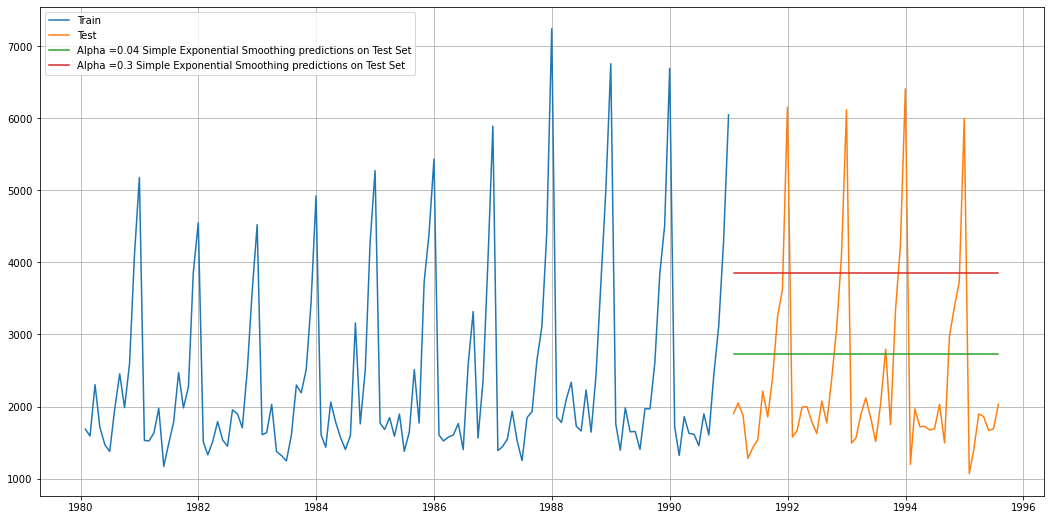

In [105]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.04 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [106]:
DES_train = train.copy()
DES_test = test.copy()

In [107]:
model_DES = Holt(DES_train['Sparkling'])

In [108]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE, Test MAPE]
Index: []

In [109]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        mape_model6_test_i = MAPE(DES_test['Sparkling'],DES_test['predict',i,j])
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test,'Test MAPE':mape_model6_test_i}, ignore_index=True)

In [110]:
resultsDf_7

Alpha Values  Beta Values   Train RMSE     Test RMSE  Test MAPE
0            0.3          0.3  1592.292788  18259.110704     675.28
1            0.3          0.4  1682.573828  26069.841401     960.18
2            0.3          0.5  1771.710791  34401.512440    1264.55
3            0.3          0.6  1848.576510  42162.748095    1548.94
4            0.3          0.7  1899.949006  47832.397419    1757.91
..           ...          ...          ...           ...        ...
59           1.0          0.6  1753.402326  49327.087977    1824.42
60           1.0          0.7  1825.187155  52655.765663    1945.23
61           1.0          0.8  1902.013709  55442.273880    2046.36
62           1.0          0.9  1985.368445  57823.177011    2132.75
63           1.0          1.0  2077.672157  59877.076519    2207.28

[64 rows x 5 columns]

In [111]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE     Test RMSE  Test MAPE
0            0.3          0.3  1592.292788  18259.110704     675.28
8            0.4          0.3  1569.338606  23878.496940     886.00
1            0.3          0.4  1682.573828  26069.841401     960.18
16           0.5          0.3  1530.575845  27095.532414    1007.39
24           0.6          0.3  1506.449870  29070.722592    1082.18

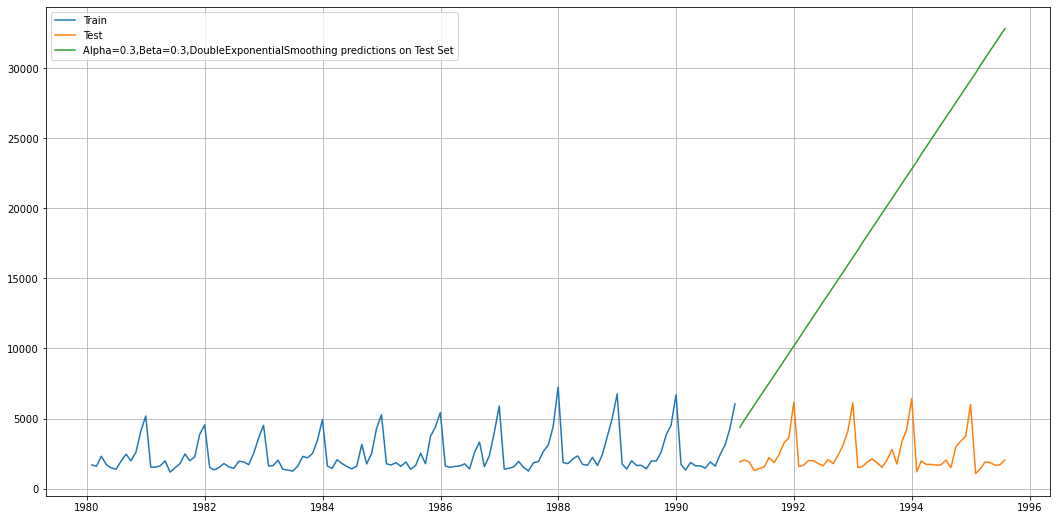

In [112]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [113]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[resultsDf_7.sort_values(by=['Test MAPE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                 1389.135175      50.15
NaiveModel                                       3864.279352     152.87
NaiveModel                                       3864.279352     152.87
SimpleAverageModel                               1275.081804      38.90
2pointTrailingMovingAverage                       813.400684      19.70
4pointTrailingMovingAverage                      1156.589694      35.96
6pointTrailingMovingAverage                      1283.927428      43.86
9pointTrailingMovingAverage                      1346.278315      46.86
Alpha =0.04 Simple Exponential Smoothing Model   1316.035487      45.47
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing   18259.110704     675.28

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [114]:
TES_train = train.copy()
TES_test = test.copy()

In [115]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'].astype("double"),trend='additive',seasonal='additive',freq='M')

In [116]:
model_TES_autofit = model_TES.fit()

In [117]:
model_TES_autofit.params

{'smoothing_level': 0.11235974440805609,
 'smoothing_trend': 0.03742154913668688,
 'smoothing_seasonal': 0.4932616459048464,
 'damping_trend': nan,
 'initial_level': 1640.2806120050896,
 'initial_trend': -3.261533670070838,
 'initial_seasons': array([  45.86595538,  -48.96808341,  662.32406973,   73.10075169,
        -168.81341007, -262.13208801,  326.10174942,  813.36401315,
         344.51476989,  956.12012048, 2446.68553948, 3538.12189099]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [118]:
## Prediction on the training data
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sparkling  auto_predict
Date                               
1980-01-31       1686   1682.885034
1980-02-29       1591   1585.152555
1980-03-31       2304   2293.877876
1980-04-30       1712   1702.610588
1980-05-31       1471   1458.609608

In [119]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test['Sparkling']))
TES_test.head()

Sparkling  auto_predict
Date                               
1991-01-31       1902   1474.966680
1991-02-28       2049   1169.991432
1991-03-31       1874   1658.920133
1991-04-30       1279   1504.953983
1991-05-31       1432   1417.648032

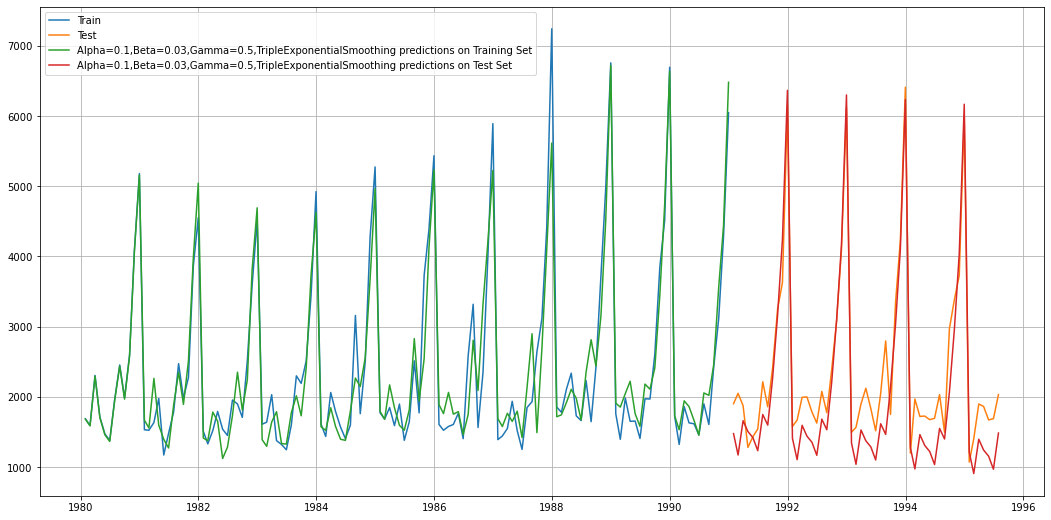

In [120]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')
plt.plot(TES_train['auto_predict'], label='Alpha=0.1,Beta=0.03,Gamma=0.5,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.1,Beta=0.03,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [121]:
## Training Data

rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model6_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print("For Alpha: 0.1,Beta: 0.03 and Gamma:0.5, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_train_1,mape_model6_train_1))

For Alpha: 0.1,Beta: 0.03 and Gamma:0.5, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 376.279 MAPE is 10.85


In [122]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha: 0.1,Beta: 0.03 and Gamma:0.5,Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test_1,mape_model6_test_1))

For Alpha: 0.1,Beta: 0.03 and Gamma:0.5,Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 473.152 MAPE is 16.53


In [123]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.1,Beta=0.03,Gamma=0.5,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha =0.04 Simple Exponential Smoothing Model       1316.035487      45.47
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.1,Beta=0.03,Gamma=0.5,TripleExponential...    473.152417      16.53

### With iterations

In [124]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Test MAPE]
Index: []

In [125]:

for i in np.arange(0.03,1.1,0.1):
    for j in np.arange(0.03,1.1,0.1):
        for k in np.arange(0.03,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test['Sparkling']))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = MAPE(TES_train['Sparkling'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = MAPE(TES_test['Sparkling'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [126]:
resultsDf_8_2.head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE  Test MAPE  \
0          0.03         0.03          0.03  487.046972  566.212453      19.01   
1          0.03         0.03          0.13  450.718917  405.509929      12.73   
2          0.03         0.03          0.23  426.249806  329.788722       9.98   
3          0.03         0.03          0.33  410.406536  317.553880       9.59   
4          0.03         0.03          0.43  401.069283  335.769813      10.78   

   Train MAPE  
0       14.84  
1       13.51  
2       12.70  
3       12.17  
4       11.84

In [127]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE  \
3            0.03         0.03          0.33  410.406536  317.553880   
122          0.13         0.03          0.13  416.264660  325.256121   
243          0.23         0.03          0.13  425.701628  326.351021   
364          0.33         0.03          0.13  435.742430  327.818278   
2            0.03         0.03          0.23  426.249806  329.788722   

     Test MAPE  Train MAPE  
3         9.59       12.17  
122      10.61       12.60  
243      10.42       12.87  
364      10.00       13.00  
2         9.98       12.70

In [128]:
resultsDf_8_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE  \
3            0.03         0.03          0.33  410.406536  317.553880   
2            0.03         0.03          0.23  426.249806  329.788722   
364          0.33         0.03          0.13  435.742430  327.818278   
607          0.53         0.03          0.23  435.932306  334.132762   
195          0.13         0.63          0.83  448.545611  340.764988   

     Test MAPE  Train MAPE  
3         9.59       12.17  
2         9.98       12.70  
364      10.00       13.00  
607      10.10       12.71  
195      10.34       13.67

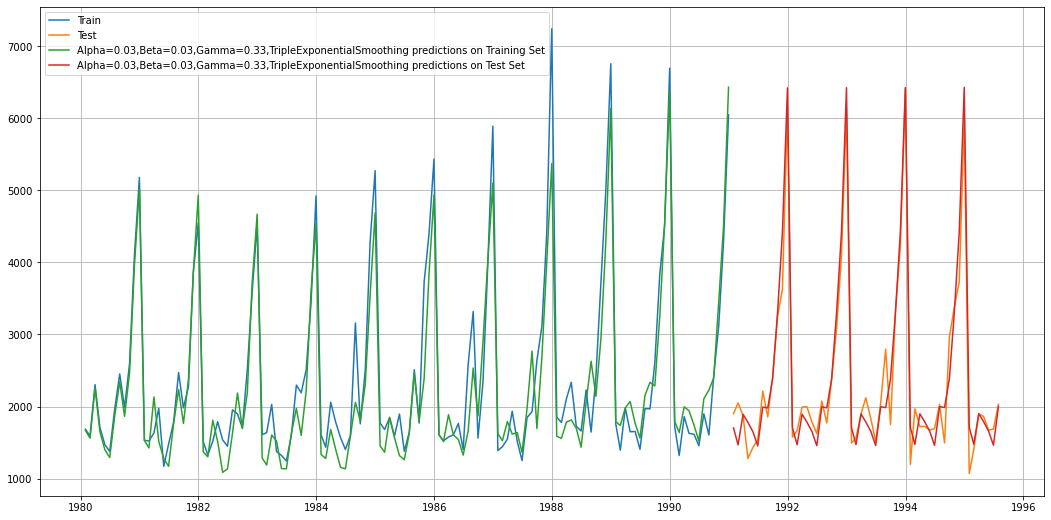

In [130]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_train['predict', 0.03, 0.03, 0.33000000000000007], label='Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.03, 0.03, 0.33000000000000007], label='Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [131]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][3]],'Test MAPE':[resultsDf_8_2['Test MAPE'][3]]}
                           ,index=['Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha =0.04 Simple Exponential Smoothing Model       1316.035487      45.47
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.1,Beta=0.03,Gamma=0.5,TripleExponential...    473.152417      16.53
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...    317.553880       9.59

In this particular we have built several models. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

We will go ahead and build only the top 2 models which gave us the best accuracy (least RMSE and MAPE).The two models to be built on the whole data are the following:

* Alpha=0.1,Beta=0.03,Gamma=0.5,TripleExponentialSmoothing
* Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing

In [ ]:
fullmodel1 = ExponentialSmoothing(df1,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.0862,
                                                                 smoothing_trend=0,
                                                                 smoothing_seasonal=0.476)

In [ ]:
RMSE_fullmodel1 = metrics.mean_squared_error(df1['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)
print("\n MAPE:",MAPE(df1['Sparkling'],fullmodel1.fittedvalues)) 

In [ ]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=len(test))

In [ ]:
plt.figure(figsize=(15,8))
df1.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [ ]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

In [ ]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set:

In [ ]:
fullmodel2 = ExponentialSmoothing(df1,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.03,
                                                                 smoothing_trend=0.03,
                                                                 smoothing_seasonal=0.33)

In [ ]:
RMSE_fullmodel2 = metrics.mean_squared_error(df1['Sparkling'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2,'\n')
print("\n MAPE:",MAPE(df1['Sparkling'],fullmodel2.fittedvalues)) 

In [ ]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=len(test))

In [ ]:
plt.figure(figsize=(15,8))
df1.plot()
prediction_2.plot();

In [ ]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df.head()

In [ ]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.


## Check for stationarity of the Whole Data Time Series.

## The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

### The hypothesis in a simple form for the ADF test is:
#### • 𝐻0 : The Time Series has a unit root and is thus non-stationary.
#### • 𝐻1 : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.(0.05)


In [132]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [133]:
adfuller(df1['Sparkling'], autolag='AIC')

(-1.3604974548123325,
 0.6010608871634875,
 11,
 175,
 {'1%': -3.4682803641749267,
  '5%': -2.8782017240816327,
  '10%': -2.5756525795918366},
 2573.1222090270685)

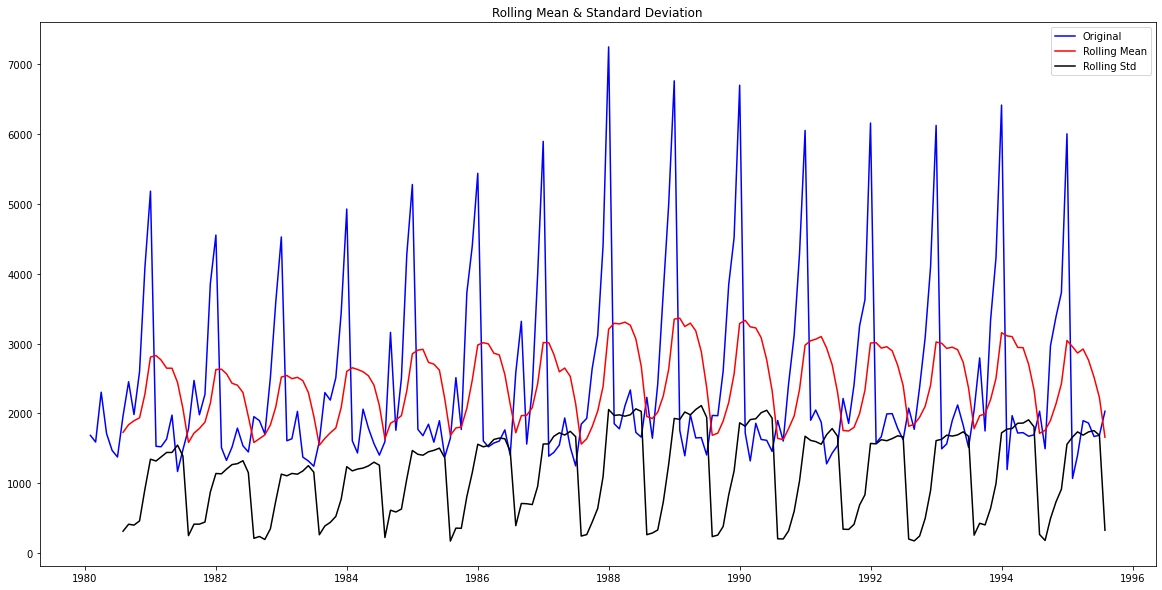

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [134]:
plt.figure(figsize=(20,10))
test_stationarity(df1['Sparkling'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

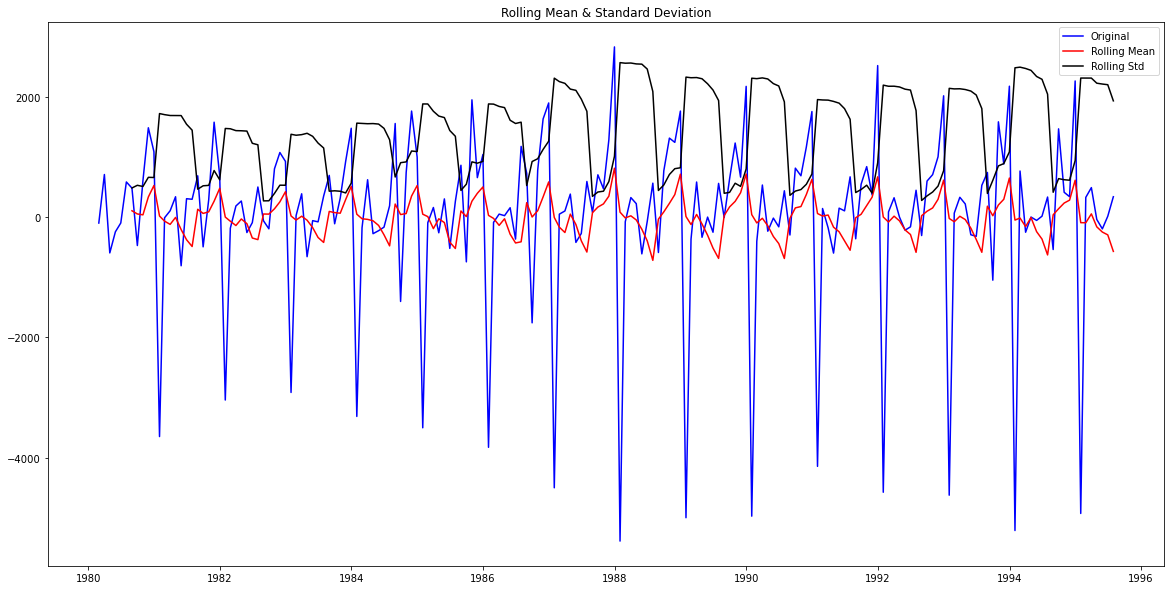

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [135]:
plt.figure(figsize=(20,10))
test_stationarity(df1['Sparkling'].diff().dropna())

We see that at $\alpha$ = 0.05 the Time Series is indeed stationary.

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

<Figure size 1080x576 with 0 Axes>

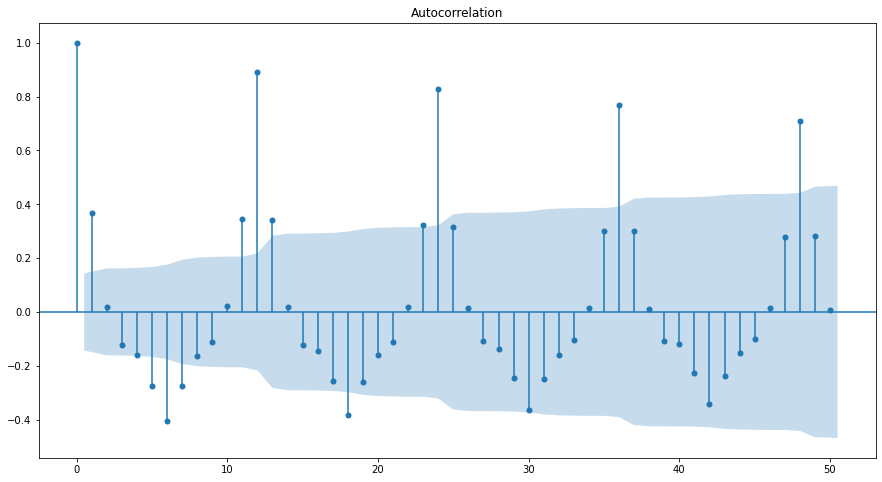

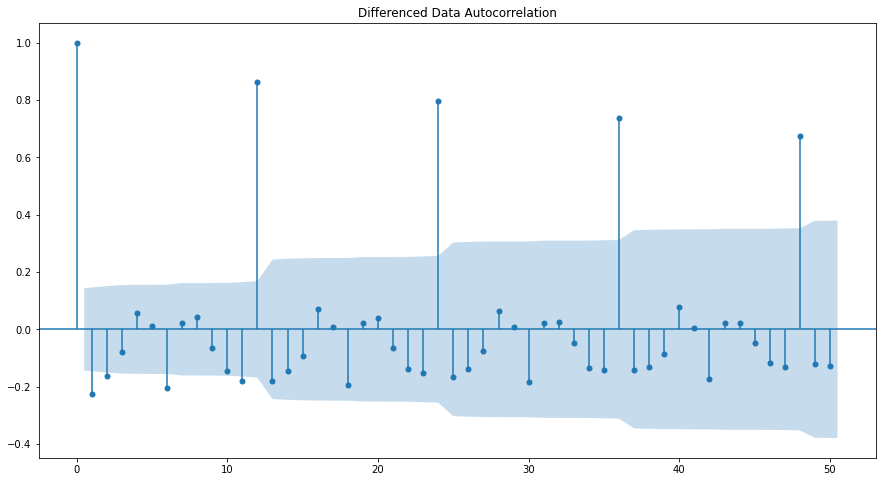

In [136]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15,8))
plot_acf(df1['Sparkling'],lags=50)
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

<Figure size 1440x720 with 0 Axes>

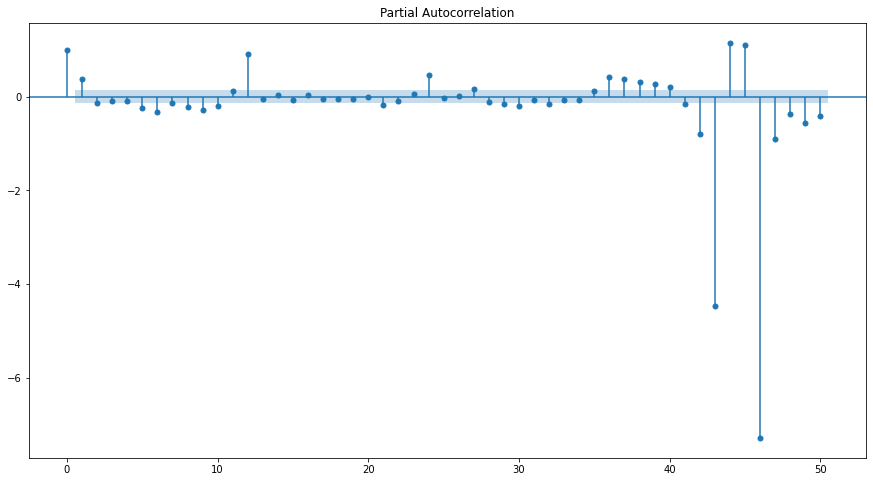

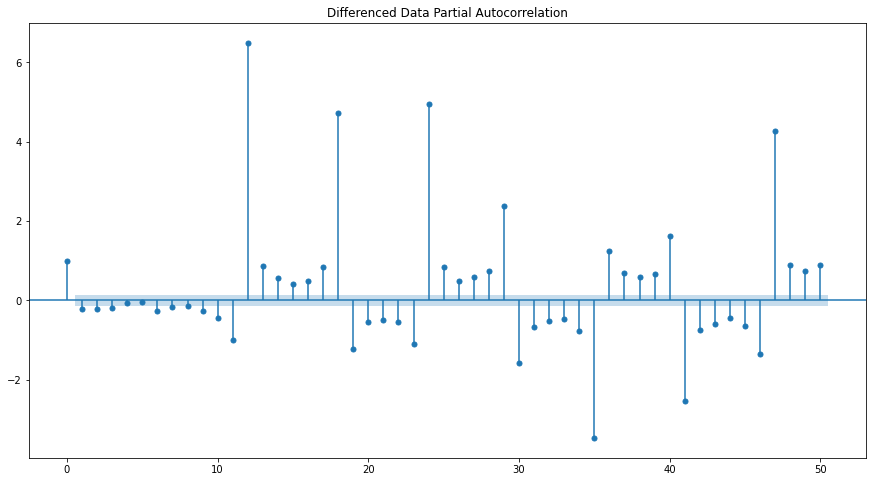

In [137]:
plt.figure(figsize=(20,10))
plot_pacf(df1['Sparkling'],lags=50)
plot_pacf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we can say that both the PACF plot cuts-off at lag 2 and ACF plot cuts-off at lag 2.
From the above plots, we can say that there seems to be a seasonality of 12 months in the dataset.

## Check for stationarity of the Training Data Time Series.

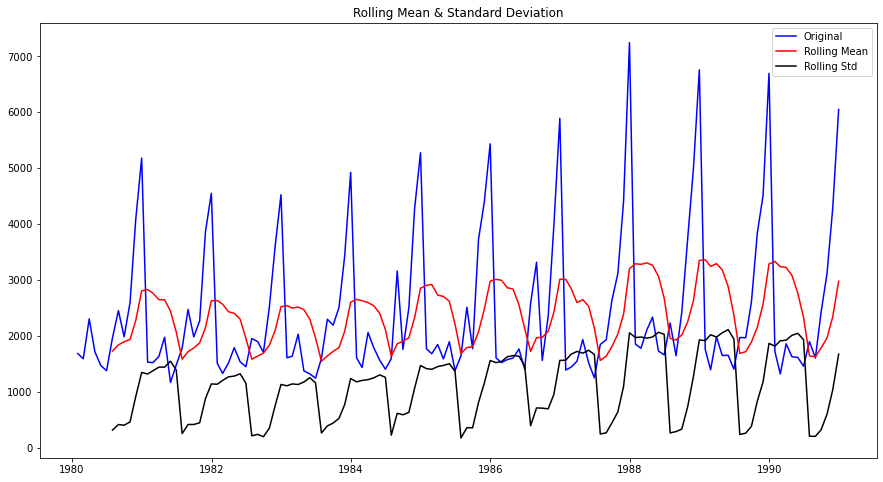

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [138]:
plt.figure(figsize=(15,8))
test_stationarity(train['Sparkling'])

We see that the series is not stationary at $\alpha$ = 0.05.

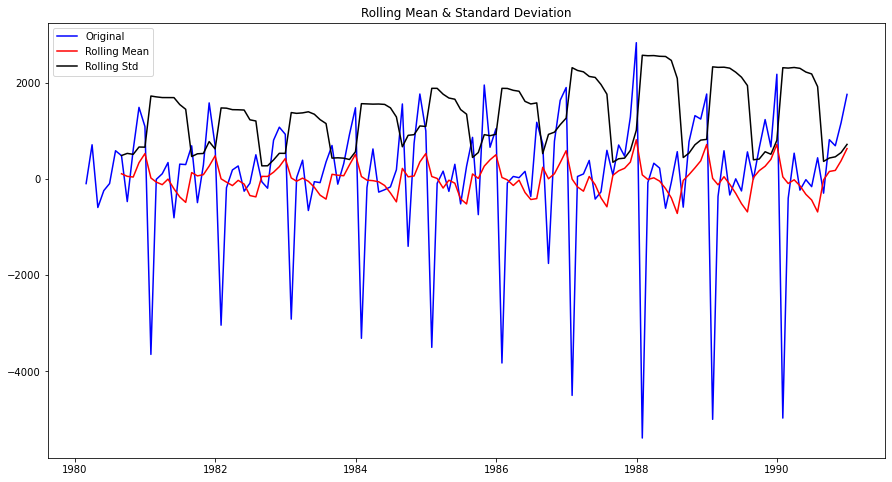

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [139]:
plt.figure(figsize=(15,8))
test_stationarity((train['Sparkling']).diff(1).dropna())

We see that after taking a difference of order 1 the series have become stationary at 𝛼 = 0.05.

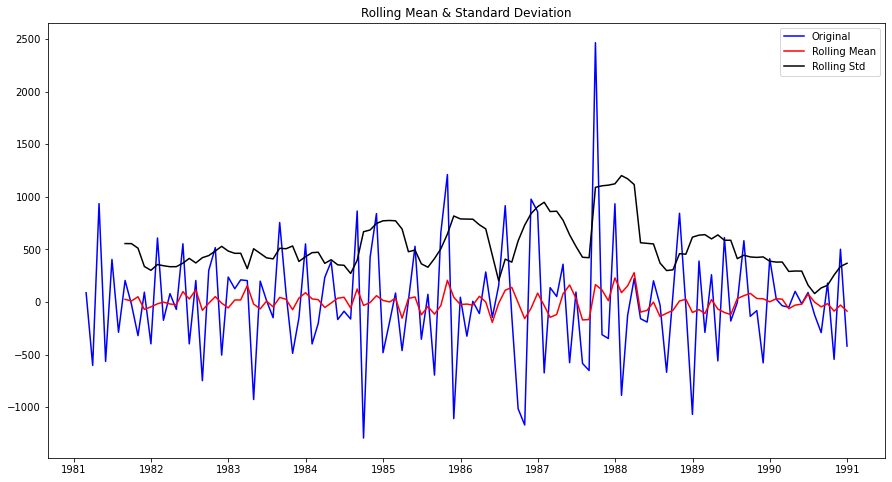

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [140]:
plt.figure(figsize=(15,8))
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

We see that after taking a difference of order 1 the series have become stationary at 𝛼 = 0.05.
And I have also taken seasonality of 12 into account from the original dataset.

Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there

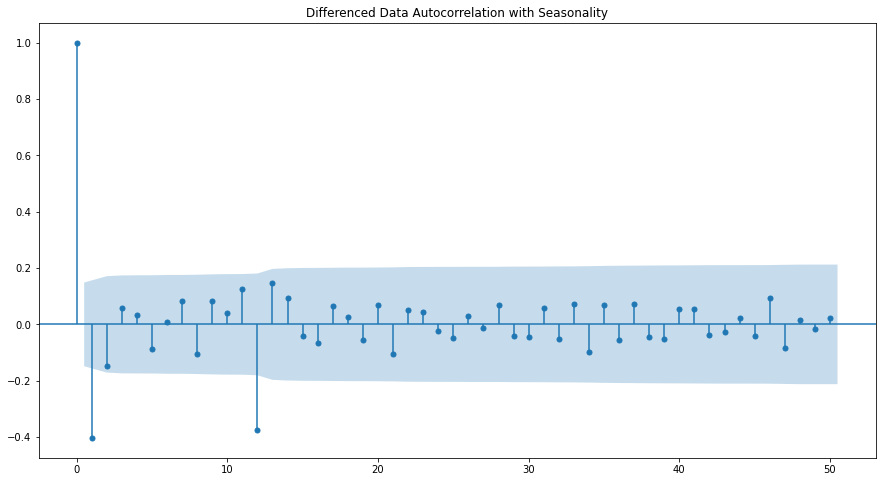

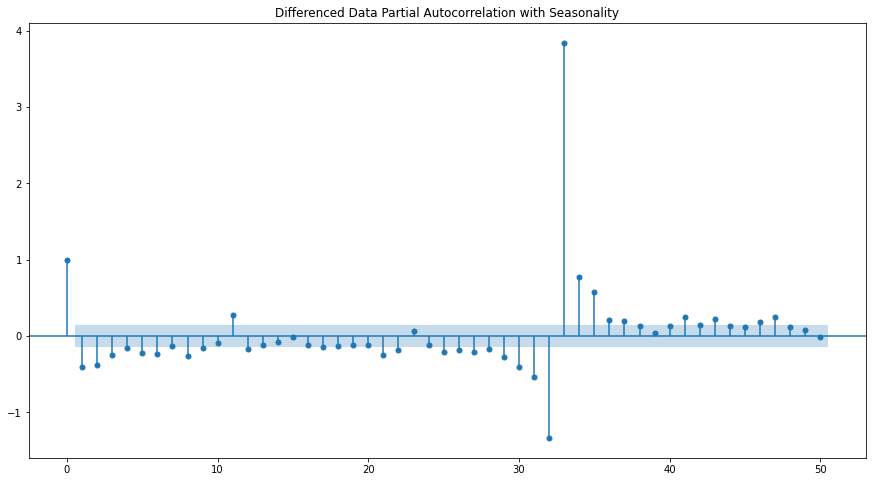

In [141]:
plot_acf((df1['Sparkling'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation with Seasonality')
plot_pacf((df1['Sparkling'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation with Seasonality');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12.
We will keep the p(2) and q(2) parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 1. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 0.
Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there

### 1.Automated version of ARIMA for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [142]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 5 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0,5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [143]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [144]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    try:
        ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
        print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
        ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    except:
        continue

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906438611577
ARIMA(0, 1, 2) - AIC:2232.78309768405
ARIMA(0, 1, 3) - AIC:2233.016605137543
ARIMA(0, 1, 4) - AIC:2233.8017181410037
ARIMA(1, 1, 0) - AIC:2268.5280607650034
ARIMA(1, 1, 1) - AIC:2235.0139453492316
ARIMA(1, 1, 2) - AIC:2233.5976471195627
ARIMA(1, 1, 3) - AIC:2234.574141546802
ARIMA(2, 1, 0) - AIC:2262.035600155025
ARIMA(2, 1, 1) - AIC:2232.3604898783688
ARIMA(2, 1, 2) - AIC:2210.6170928876713
ARIMA(2, 1, 3) - AIC:2229.3580937713064
ARIMA(2, 1, 4) - AIC:2220.2204991373915
ARIMA(3, 1, 0) - AIC:2259.471554891012
ARIMA(3, 1, 1) - AIC:2233.9217531208037
ARIMA(3, 1, 2) - AIC:2228.927401013348
ARIMA(3, 1, 3) - AIC:2225.661558525269
ARIMA(3, 1, 4) - AIC:2226.054855756074
ARIMA(4, 1, 0) - AIC:2261.468154689758
ARIMA(4, 1, 1) - AIC:2235.131466031713
ARIMA(4, 1, 2) - AIC:2230.8960232466206
ARIMA(4, 1, 3) - AIC:2226.954554251002


In [145]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
11  (2, 1, 2)  2210.617093
13  (2, 1, 4)  2220.220499
17  (3, 1, 3)  2225.661559
18  (3, 1, 4)  2226.054856
22  (4, 1, 3)  2226.954554
16  (3, 1, 2)  2228.927401
12  (2, 1, 3)  2229.358094
21  (4, 1, 2)  2230.896023
10  (2, 1, 1)  2232.360490
2   (0, 1, 2)  2232.783098
3   (0, 1, 3)  2233.016605
7   (1, 1, 2)  2233.597647
4   (0, 1, 4)  2233.801718
15  (3, 1, 1)  2233.921753
8   (1, 1, 3)  2234.574142
6   (1, 1, 1)  2235.013945
20  (4, 1, 1)  2235.131466
14  (3, 1, 0)  2259.471555
19  (4, 1, 0)  2261.468155
9   (2, 1, 0)  2262.035600
1   (0, 1, 1)  2264.906439
5   (1, 1, 0)  2268.528061
0   (0, 1, 0)  2269.582796

In [146]:
mod = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.061
Date:                Sun, 20 Mar 2022   AIC                           2210.617
Time:                        22:02:22   BIC                           2227.868
Sample:                    02-29-1980   HQIC                          2217.627
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5859      0.516     10.818      0.000       4.574       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.047      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

### Prediction on the Test Set using Auto ARIMA model and evaluation

In [147]:
predicted_arima = results_Arima.forecast(steps=len(test))

In [148]:
test_rmse_arima = metrics.mean_squared_error(test['Sparkling'],predicted_arima[0],squared=False)
test_mape_arima= MAPE(test['Sparkling'],predicted_arima[0])
print("Test rmse for arima is ",test_rmse_arima)
print("Test mape for arima is ",test_mape_arima)

Test rmse for arima is  1375.0019866285338
Test mape for arima is  48.39


In [149]:
resultsDf_9 = pd.DataFrame({'Test RMSE': test_rmse_arima,'Test MAPE':test_mape_arima}
                           ,index=['ARIMA (2,1,2)'])
resultsDf_9

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha =0.04 Simple Exponential Smoothing Model       1316.035487      45.47
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.1,Beta=0.03,Gamma=0.5,TripleExponential...    473.152417      16.53
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...    317.553880       9.59
ARIMA (2,1,2)                                        1375.001987      48.39

### 2. Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [150]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0,3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [151]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [152]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844612
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640235918
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388492
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735792244
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158609058
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920817
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566217
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573472836
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838032
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193780284
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144368003
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176586
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245090846698
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018828817655
SARIMA(0, 

In [153]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121570
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [154]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 20 Mar 2022   AIC                           1555.584
Time:                                    22:31:43   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

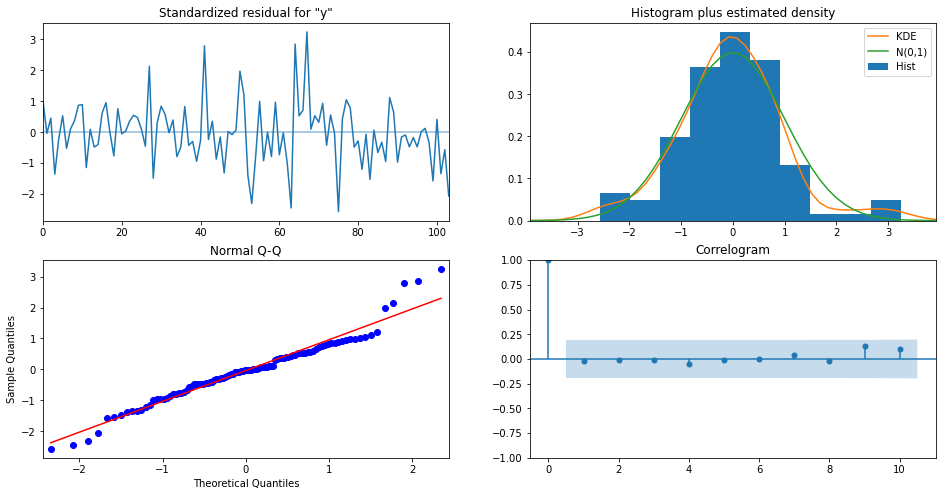

In [155]:
results_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

### Prediction on the Test Set using Auto SARIMA model and evaluation

In [156]:
pred_test_SARIMA = results_SARIMA.get_forecast(steps=len(test))
pred_test_SARIMA.predicted_mean

array([1327.39684722, 1315.12686599, 1621.59404934, 1598.88086935,
       1392.70014769, 1224.83037137, 1780.44820275, 1787.84409246,
       2192.56024465, 3184.3555935 , 4490.64948214, 6525.06797215,
       1307.26821564, 1172.77293589, 1572.1581342 , 1504.45042777,
       1306.8162338 , 1095.97238173, 1717.00466552, 1784.53621897,
       2126.37379124, 3224.72127787, 4587.09481409, 6765.75276431,
       1251.56051097, 1074.68289853, 1514.51009631, 1429.43560274,
       1232.17204058, 1006.39533241, 1658.24794589, 1726.50119588,
       2084.74728661, 3230.40726241, 4653.11942343, 6927.03098434,
       1171.08722375,  986.31021478, 1445.52420239, 1356.66215846,
       1150.77653031,  915.07096103, 1595.54129151, 1666.781129  ,
       2040.75289738, 3236.68276176, 4721.82770336, 7095.52049822,
       1086.99836785,  894.11255439, 1373.47784753, 1280.71620241,
       1065.79614188,  819.74738784, 1530.07779864])

In [157]:
pred_test_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.396847  388.341965     566.260582    2088.533113
1  1315.126866  402.004360     527.212798    2103.040934
2  1621.594049  401.997971     833.692504    2409.495595
3  1598.880869  407.235631     800.713699    2397.048039
4  1392.700148  407.965489     593.102482    2192.297814

In [158]:
test_rmse_sarima = metrics.mean_squared_error(test['Sparkling'],pred_test_SARIMA.predicted_mean,squared=False)
test_mape_sarima= MAPE(test['Sparkling'],pred_test_SARIMA.predicted_mean)
print("Test rmse for SARIMA is ",test_rmse_sarima)
print("Test mape for SARIMA is ",test_mape_sarima)

Test rmse for SARIMA is  528.6041848904955
Test mape for SARIMA is  18.89


In [159]:
resultsDf_10 = pd.DataFrame({'Test RMSE': test_rmse_sarima,'Test MAPE':test_mape_sarima}
                           ,index=['SARIMA(1, 1, 2)(1, 0, 2, 12)'])
resultsDf_10

resultsDf = pd.concat([resultsDf,resultsDf_10])

resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha =0.04 Simple Exponential Smoothing Model       1316.035487      45.47
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.1,Beta=0.03,Gamma=0.5,TripleExponential...    473.152417      16.53
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...    317.553880       9.59
ARIMA (2,1,2)                                        1375.001987      48.39
SARIMA(1, 1, 2)(1, 0, 2, 12)                          528.604185      18.89

# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### 1. Manual ARIMA Model

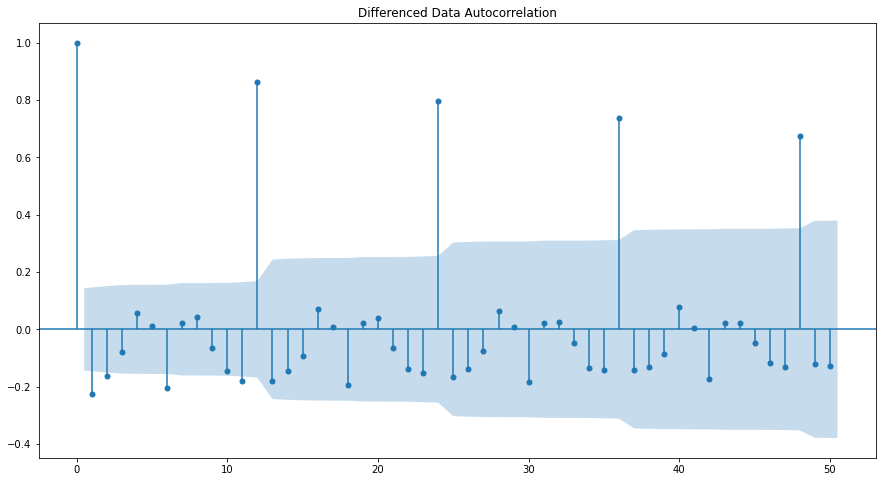

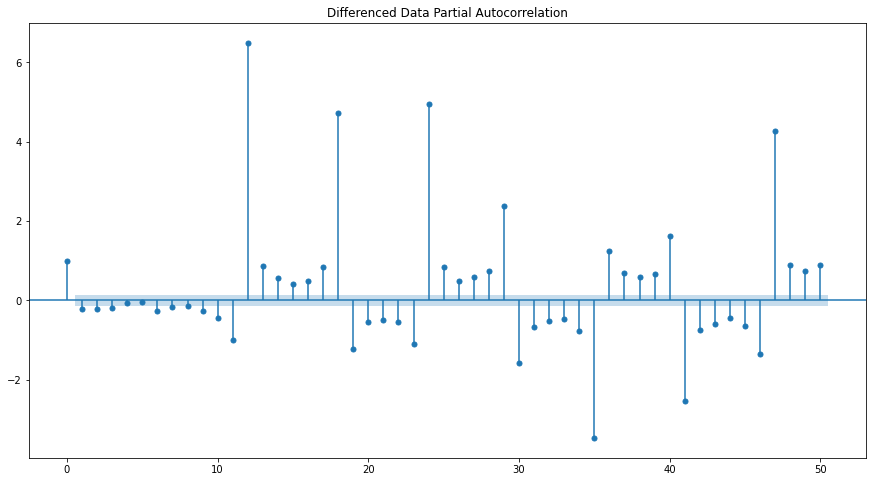

In [160]:
plot_acf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df1['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [161]:
mod_new = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2),freq='M')
# if some value is in decimal, float will prevent it from getting rounded off, hence providing better forecast keeping the original values intact
#most of time, if you take p=q=0, convert to float
results_Arima_new = mod_new.fit()

print(results_Arima_new.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.107
Date:                Sun, 20 Mar 2022   AIC                           2228.927
Time:                        22:31:49   BIC                           2249.054
Sample:                    02-29-1980   HQIC                          2237.106
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9849      3.643      1.643      0.100      -1.156      13.126
ar.L1.D.Sparkling    -0.4420   5.43e-06  -8.14e+04      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.

In [162]:
predicted_arima_manual = results_Arima_new.forecast(steps=len(test))

In [163]:
test_rmse_arima_new = metrics.mean_squared_error(test['Sparkling'],predicted_arima_manual[0],squared=False)
test_mape_arima_new= MAPE(test['Sparkling'],predicted_arima_manual[0])
print("Test rmse for Manual arima is ",test_rmse_arima_new)
print("Test mape for Manual arima is ",test_mape_arima_new)

Test rmse for Manual arima is  1378.9863774088376
Test mape for Manual arima is  49.31


In [164]:
resultsDf_12 = pd.DataFrame({'Test RMSE': test_rmse_arima_new,'Test MAPE':test_mape_arima_new}
                           ,index=['ARIMA(3,1,2)'])
resultsDf_12

Test RMSE  Test MAPE
ARIMA(3,1,2)  1378.986377      49.31

In [165]:
resultsDf = pd.concat([resultsDf,resultsDf_12])

resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha =0.04 Simple Exponential Smoothing Model       1316.035487      45.47
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.1,Beta=0.03,Gamma=0.5,TripleExponential...    473.152417      16.53
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...    317.553880       9.59
ARIMA (2,1,2)                                        1375.001987      48.39
SARIMA(1, 1, 2)(1, 0, 2, 12)                          528.604185      18.89
ARIMA(3,1,2)                                         1378.986377      49.31

### Manual SARIMA

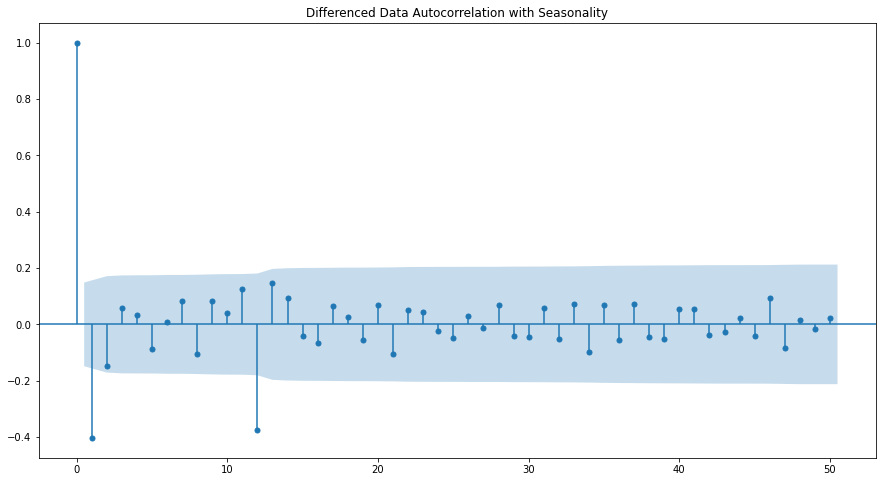

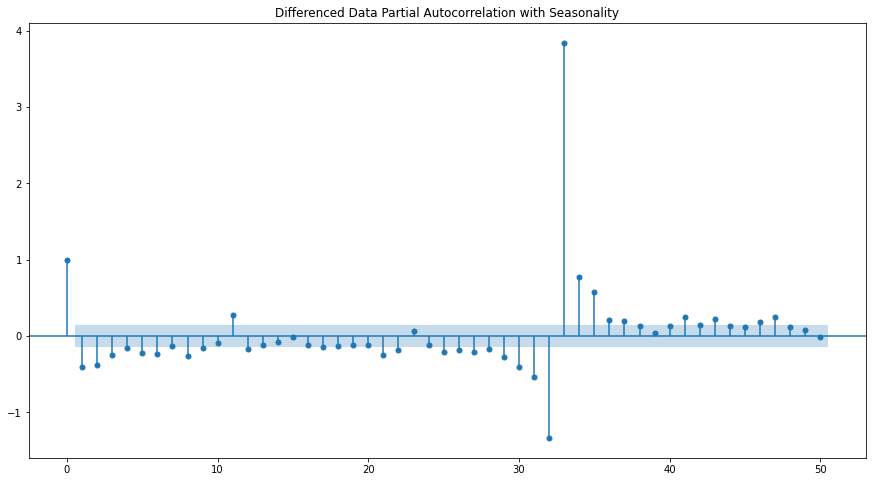

In [166]:
plot_acf((df1['Sparkling'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation with Seasonality')
plot_pacf((df1['Sparkling'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation with Seasonality');

In [167]:
import statsmodels.api as sm

mod_sar = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_new = mod_sar.fit(maxiter=1000)
print(results_SARIMA_new.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 20 Mar 2022   AIC                           1555.584
Time:                                    22:31:53   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

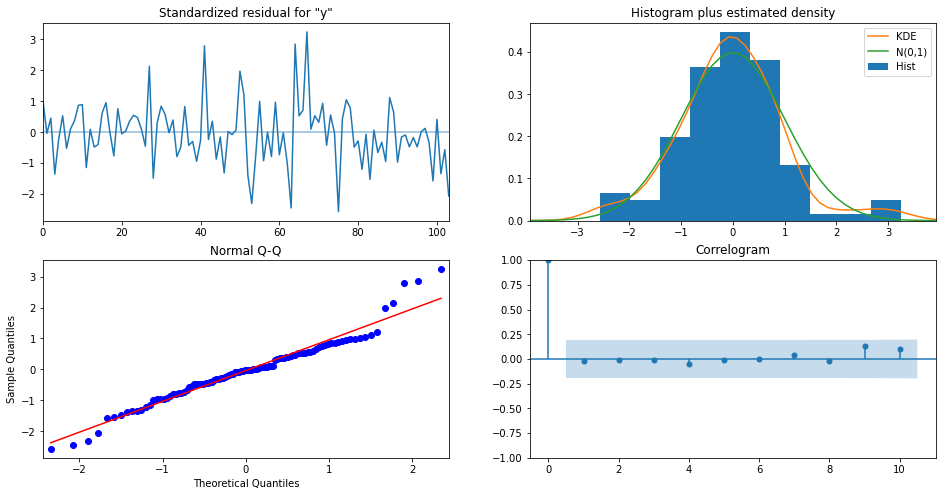

In [174]:
results_SARIMA_new.plot_diagnostics(figsize=(16, 8))
plt.show()

In [168]:
pred_test_SARIMA_new = results_SARIMA_new.get_forecast(steps=len(test))
pred_test_SARIMA_new.predicted_mean

array([1327.39684722, 1315.12686599, 1621.59404934, 1598.88086935,
       1392.70014769, 1224.83037137, 1780.44820275, 1787.84409246,
       2192.56024465, 3184.3555935 , 4490.64948214, 6525.06797215,
       1307.26821564, 1172.77293589, 1572.1581342 , 1504.45042777,
       1306.8162338 , 1095.97238173, 1717.00466552, 1784.53621897,
       2126.37379124, 3224.72127787, 4587.09481409, 6765.75276431,
       1251.56051097, 1074.68289853, 1514.51009631, 1429.43560274,
       1232.17204058, 1006.39533241, 1658.24794589, 1726.50119588,
       2084.74728661, 3230.40726241, 4653.11942343, 6927.03098434,
       1171.08722375,  986.31021478, 1445.52420239, 1356.66215846,
       1150.77653031,  915.07096103, 1595.54129151, 1666.781129  ,
       2040.75289738, 3236.68276176, 4721.82770336, 7095.52049822,
       1086.99836785,  894.11255439, 1373.47784753, 1280.71620241,
       1065.79614188,  819.74738784, 1530.07779864])

In [169]:
pred_test_SARIMA_new.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.396847  388.341965     566.260582    2088.533113
1  1315.126866  402.004360     527.212798    2103.040934
2  1621.594049  401.997971     833.692504    2409.495595
3  1598.880869  407.235631     800.713699    2397.048039
4  1392.700148  407.965489     593.102482    2192.297814

In [170]:
test_rmse_sarima_new = metrics.mean_squared_error(test['Sparkling'],pred_test_SARIMA_new.predicted_mean,squared=False)
test_mape_sarima_new= MAPE(test['Sparkling'],pred_test_SARIMA_new.predicted_mean)
print("Test rmse for Manual sarima is ",test_rmse_sarima_new)
print("Test mape for Manual sarima is ",test_mape_sarima_new)

Test rmse for Manual sarima is  528.6041848904955
Test mape for Manual sarima is  18.89


In [171]:
resultsDf_13 = pd.DataFrame({'Test RMSE': test_rmse_sarima_new,'Test MAPE':test_mape_sarima_new}
                           ,index=['SARIMA(1, 1, 2)(1, 0, 0, 12)'])

resultsDf = pd.concat([resultsDf,resultsDf_13])

resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                     1389.135175      50.15
NaiveModel                                           3864.279352     152.87
NaiveModel                                           3864.279352     152.87
SimpleAverageModel                                   1275.081804      38.90
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
6pointTrailingMovingAverage                          1283.927428      43.86
9pointTrailingMovingAverage                          1346.278315      46.86
Alpha =0.04 Simple Exponential Smoothing Model       1316.035487      45.47
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       18259.110704     675.28
Alpha=0.1,Beta=0.03,Gamma=0.5,TripleExponential...    473.152417      16.53
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...    317.553880       9.59
ARIMA (2,1,2)                                        1375.001987      48.39
SARIMA(1, 1, 2)(1, 0, 2, 12)                          528.604185      18.89
ARIMA(3,1,2)                                         1378.986377      49.31
SARIMA(1, 1, 2)(1, 0, 0, 12)                          528.604185      18.89

# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [173]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']),'\n','\n','\n')
print('Sorted by MAPE values on the Test Data:','\n',resultsDf.sort_values(by=['Test MAPE']))

Sorted by RMSE values on the Test Data: 
                                                        Test RMSE  Test MAPE
Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponenti...    317.553880       9.59
Alpha=0.1,Beta=0.03,Gamma=0.5,TripleExponential...    473.152417      16.53
SARIMA(1, 1, 2)(1, 0, 2, 12)                          528.604185      18.89
SARIMA(1, 1, 2)(1, 0, 0, 12)                          528.604185      18.89
2pointTrailingMovingAverage                           813.400684      19.70
4pointTrailingMovingAverage                          1156.589694      35.96
SimpleAverageModel                                   1275.081804      38.90
6pointTrailingMovingAverage                          1283.927428      43.86
Alpha =0.04 Simple Exponential Smoothing Model       1316.035487      45.47
9pointTrailingMovingAverage                          1346.278315      46.86
ARIMA (2,1,2)                                        1375.001987      48.39
ARIMA(3,1,2)                                  

# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## We see that the best model is the Triple Exponential Smoothing with additive seasonality with the parameters 𝛼 = 0.03, 𝛽 = 0.03 and 𝛾 = 0.33.

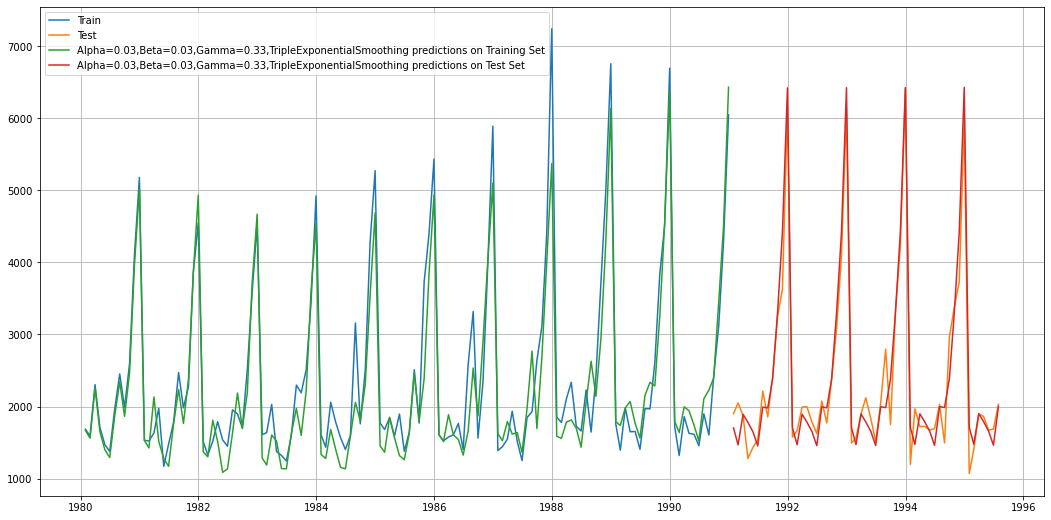

In [175]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_train['predict', 0.03, 0.03, 0.33000000000000007], label='Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 0.03, 0.03, 0.33000000000000007], label='Alpha=0.03,Beta=0.03,Gamma=0.33,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [176]:
fullmodel1 = ExponentialSmoothing(df1['Sparkling'].astype("double"),trend='additive',seasonal='additive',freq='M').fit(
    smoothing_level=0.03,smoothing_slope=0.03,smoothing_seasonal=0.33)

In [177]:
RMSE_fullmodel1 = metrics.mean_squared_error(df1['Sparkling'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(df1['Sparkling'],fullmodel1.fittedvalues)

print('RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

RMSE: 364.0751576684798 
MAPE: 10.93


In [178]:
# Getting the predictions for the 12 months
prediction_1 = fullmodel1.forecast(steps=12)
prediction_1

1995-08-31    1938.336822
1995-09-30    2419.476144
1995-10-31    3280.986121
1995-11-30    3998.450523
1995-12-31    6164.402641
1996-01-31    1336.296165
1996-02-29    1621.453894
1996-03-31    1856.928998
1996-04-30    1826.032100
1996-05-31    1677.731338
1996-06-30    1605.037257
1996-07-31    2031.547055
Freq: M, dtype: float64

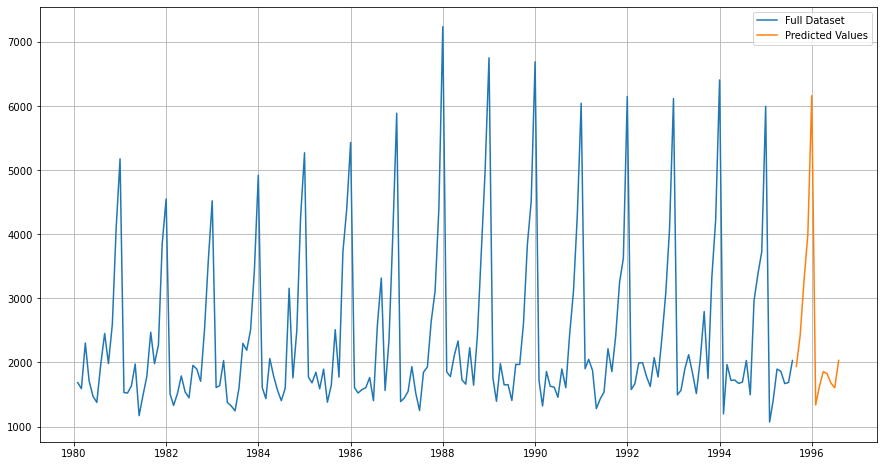

In [179]:
plt.figure(figsize=(15,8))
plt.plot(df1['Sparkling'],label='Full Dataset')
plt.plot(prediction_1,label='Predicted Values')
plt.legend(loc='best')
plt.grid();

In [180]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

lower_CI   prediction      upper_ci
1995-08-31   528.136857  1938.336822   7507.102631
1995-09-30  1009.276179  2419.476144   7988.241953
1995-10-31  1870.786156  3280.986121   8849.751930
1995-11-30  2588.250558  3998.450523   9567.216332
1995-12-31  4754.202676  6164.402641  11733.168450

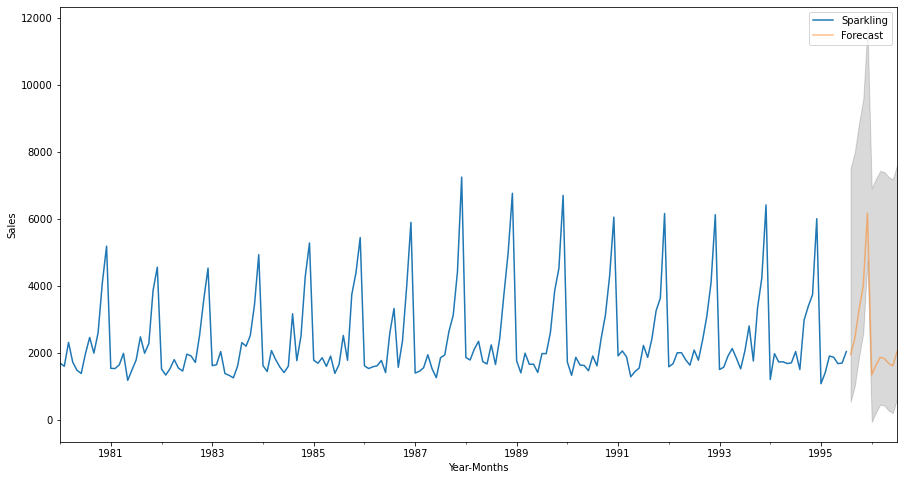

In [181]:
# plot the forecast along with the confidence band

axis = df1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

# 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

* Triple Exponential Model is performing best in this case giving us the least error.
* Looking at the bar plot, we can see that on December months the sales are highest. We can use this insights to increase our sales further.
* We can introduce certain offers in November, December months to attaract more customers.
* On Saturdays mean sales of the wine is highest. We can give certain offers to attract more customers.
* Year 1988 has the highest sales recorded till data. We can go back to find out the reasons to which pushed the sales so much.
*  We can also see in the year 1981, 1983 and 1994 the Wine sales in the month of October, November remained constant after that it has starting fluctuating needs to pay attention after that.

###### Looking at the prediction, we can say that the sales figure will be more or less same as that of previous year. Hence some important measures have to be taken to increase the trend. As the trend has been more or less constant through out the years.